In [1]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'/Users/murat/Library/CloudStorage/OneDrive-UniversityofRochester/UR_Projects/CampaignContribution_Winner_Kaggle/Data'

In [63]:
train = pd.read_csv("./train_data_new.csv")
test = pd.read_csv("./test_data_new.csv")

/var/folders/nd/dj_lrx2d6j3fccjhjy5pqygc0000gn/T/ipykernel_21356/2922911961.py:1: DtypeWarning: Columns (31,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("./train_data_new.csv")


In [64]:
train = pd.read_csv("./train_data_new.csv")
test = pd.read_csv("./test_data_new.csv")
cat_vars = ['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'contributor_type']
train_num_vars = ['winner_ratio', 'candidacy_count',
       'candidacy_democratic_count', 'candidacy_republican_count',
       'contribution_count', 'contribution_democratic_count',
       'contribution_republican_count', 'politician_challenger_count',
       'politician_count', 'politician_democratic_count',
       'politician_incumbency_count', 'politician_open_pos_count',
       'politician_republican_count', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'governor_contributions_sum_2010_usd',
       'house_and_assembly_contributions_sum_2010_usd',
       'senate_contributions_sum_2010_usd',
       'us_house_contributions_sum_2010_usd',
       'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio', 'governor_contribution_ratio',
       'house_and_assembly_contribution_ratio', 'politician_challenger_ratio',
       'politician_democratic_ratio', 'politician_incumbency_ratio',
       'politician_open_pos_ratio', 'politician_republican_ratio',
       'senate_contribution_ratio', 'us_house_contribution_ratio',
       'us_senate_contribution_ratio', 'contrib_state_deg',
       'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
       'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr',
       'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr',
       'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr',
       'state_win_comm']
test_num_vars = [col for col in train_num_vars if col != "winner_ratio"]



/var/folders/nd/dj_lrx2d6j3fccjhjy5pqygc0000gn/T/ipykernel_21356/1325753709.py:1: DtypeWarning: Columns (31,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("./train_data_new.csv")


# Missing Values analysis:

In [77]:
# fake_missing_values = ['0', '0.0', 'Uncoded', 'None', '']
# for col in cat_vars:
#     col_values = train[col].astype(str)
#     value_counts = col_values[col_values.isin(fake_missing_values)].value_counts()

#     if not value_counts.empty:
#         print(f"\nColumn '{col}':")
#         print(value_counts.rename("count").to_frame())
#         print(f"→ Replacing total {value_counts.sum()} entries with 'Other_{col}'")
        
#         train.loc[col_values.isin(fake_missing_values), col] = f"Other_{col}"
#     else:
#         print(f"\nColumn '{col}': No fake-missing values found.")


In [65]:
fake_missing_values = ['0', '0.0', 'None', '']

# To keep track of all rows with fake-missing values
rows_to_drop = set()

for col in cat_vars:
    col_values = train[col].astype(str)
    mask = col_values.isin(fake_missing_values)
    value_counts = col_values[mask].value_counts()

    if not value_counts.empty:
        print(f"\nColumn '{col}':")
        print(value_counts.rename("count").to_frame())
        print(f"→ Found {mask.sum()} rows with fake-missing values — marking for drop")
        
        # Add row indices to the drop set
        rows_to_drop.update(train[mask].index)
    else:
        print(f"\nColumn '{col}': No fake-missing values found.")

# Drop all affected rows once
print(f"\n🚨 Dropping total {len(rows_to_drop)} rows from train DataFrame.")
train.drop(index=rows_to_drop, inplace=True)
train.reset_index(drop=True, inplace=True)  # Optional: clean index after drop



Column 'general_sector': No fake-missing values found.

Column 'city':
      count
city       
0      1468
→ Found 1468 rows with fake-missing values — marking for drop

Column 'zip_code':
          count
zip_code       
0.0        4431
→ Found 4431 rows with fake-missing values — marking for drop

Column 'specific_sector': No fake-missing values found.

Column 'state': No fake-missing values found.

Column 'contributor_type': No fake-missing values found.

🚨 Dropping total 4447 rows from train DataFrame.


In [66]:
#dropping city and zip_code from train and test:
train = train.drop(columns=["city", "zip_code"])
test = test.drop(columns=["city", "zip_code"])

In [ ]:
# ### Check fake missing values for test data

# fake_missing_values = ['0', '0.0', 'None', '']

# # To keep track of all rows with fake-missing values
# rows_to_drop = set()

# for col in cat_vars:
#     col_values = test[col].astype(str)
#     mask = col_values.isin(fake_missing_values)
#     value_counts = col_values[mask].value_counts()

#     if not value_counts.empty:
#         print(f"\nColumn '{col}':")
#         print(value_counts.rename("count").to_frame())
#         print(f"→ Found {mask.sum()} rows with fake-missing values — marking for drop")
        
#         # Add row indices to the drop set
#         rows_to_drop.update(test[mask].index)
#     else:
#         print(f"\nColumn '{col}': No fake-missing values found.")

# # Drop all affected rows once
# print(f"\n🚨 Dropping total {len(rows_to_drop)} rows from train DataFrame.")
# test.drop(index=rows_to_drop, inplace=True)
# test.reset_index(drop=True, inplace=True)  # Optional: clean index after drop



Column 'general_sector': No fake-missing values found.

Column 'city':
      count
city       
0       952
→ Found 952 rows with fake-missing values — marking for drop

Column 'zip_code':
          count
zip_code       
0.0        2895
→ Found 2895 rows with fake-missing values — marking for drop

Column 'specific_sector': No fake-missing values found.

Column 'state': No fake-missing values found.

Column 'contributor_type': No fake-missing values found.

🚨 Dropping total 2910 rows from train DataFrame.


In [67]:
print(train.shape, test.shape)

(168401, 55) (115232, 56)


In [5]:
cols = ["governor_contribution_ratio",  "governor_contributions_sum_2010_usd",   "contribution_sum_2010_usd",
        "house_and_assembly_contribution_ratio","house_and_assembly_contributions_sum_2010_usd","contribution_sum_2010_usd",
        "senate_contribution_ratio",    "senate_contributions_sum_2010_usd", "contribution_sum_2010_usd",
        "us_house_contribution_ratio",  "us_house_contributions_sum_2010_usd",    "contribution_sum_2010_usd",
        "us_senate_contribution_ratio", "us_senate_contributions_sum_2010_usd",   "contribution_sum_2010_usd"
        ]
train[cols].iloc[1435:1438]


,governor_contribution_ratio,governor_contributions_sum_2010_usd,contribution_sum_2010_usd,house_and_assembly_contribution_ratio,house_and_assembly_contributions_sum_2010_usd,contribution_sum_2010_usd,senate_contribution_ratio,senate_contributions_sum_2010_usd,contribution_sum_2010_usd,us_house_contribution_ratio,us_house_contributions_sum_2010_usd,contribution_sum_2010_usd,us_senate_contribution_ratio,us_senate_contributions_sum_2010_usd,contribution_sum_2010_usd
1435,0.139877,2284.93,16335.31,0.215339,3517.63,16335.31,0.644784,10532.75,16335.31,0.0,0.0,16335.31,0.0,0.00,16335.31
1436,0.0,0.00,8065.60,0.000000,0.00,8065.60,0.0,0.00,8065.60,1.0,8065.6,8065.60,0.0,0.00,8065.60
1437,0.0,0.00,1497.66,0.000000,0.00,1497.66,0.0,0.00,1497.66,0.0,0.0,1497.66,1.0,1497.66,1497.66


In [68]:
train[train_num_vars] = train[train_num_vars].apply(pd.to_numeric, errors='coerce')
test[test_num_vars] = test[test_num_vars].apply(pd.to_numeric, errors='coerce')

In [83]:

# cols_with_negatives = ['contribution_democratic_sum_2010_usd','contribution_republican_sum_2010_usd','contribution_sum_2010_usd',
# 'governor_contributions_sum_2010_usd',
# 'house_and_assembly_contributions_sum_2010_usd','senate_contributions_sum_2010_usd','us_house_contributions_sum_2010_usd',
# 'us_senate_contributions_sum_2010_usd','governor_contribution_ratio','house_and_assembly_contribution_ratio','senate_contribution_ratio',
# 'us_house_contribution_ratio','us_senate_contribution_ratio']

# ### Treat these descrepent columns
# for col in cols_with_negatives:
#     train[col] = train[col].clip(lower=0)
#     test[col] = test[col].clip(lower=0)

In [69]:
# Drop states with count less than 5
state_counts = train['state'].value_counts()

# Filter to keep only states with at least 5 records
train = train[train['state'].isin(state_counts[state_counts >= 10].index)]


In [70]:
# 1. Check how many duplicate rows exist
num_duplicates_train = train.duplicated().sum()
num_duplicates_test = test.duplicated().sum()

print(f"🔍 Number of duplicate rows in train: {num_duplicates_train}")
print(f"🔍 Number of duplicate rows in test: {num_duplicates_test}")

# 2. Drop duplicate records
train = train.drop_duplicates()
# Keeping duplicates in test set
# test = test.drop_duplicates()

print(f"✅ Duplicates removed for train. New shape: {train.shape}")
print(f"✅ Duplicates removed for test. New shape: {test.shape}")

🔍 Number of duplicate rows in train: 21236
🔍 Number of duplicate rows in test: 0
✅ Duplicates removed for train. New shape: (147139, 55)
✅ Duplicates removed for test. New shape: (115232, 56)


# Check association between categorical variables and target variable

In [72]:
# we dropped the columns 'city' and 'zip_code' from train and test dataframes:

cat_vars=['general_sector',
 #'city',
 #'zip_code',
 'specific_sector',
 'state',
 'contributor_type']

In [73]:
from scipy.stats import ttest_ind, f_oneway
import pandas as pd

# Ensure winner_ratio is numeric
train["winner_ratio"] = pd.to_numeric(train["winner_ratio"], errors="coerce")

results = []

for col in cat_vars:
    unique_vals = train[col].nunique()
    
    if unique_vals < 2:
        print(f"⚠️ Skipping '{col}' — only one category")
        continue

    print(f"\n📊 Analyzing '{col}' with {unique_vals} categories:")

    # Drop rows with missing or bad values in current column
    df = train[[col, "winner_ratio"]].dropna()
    
    # Binary case: t-test
    if unique_vals == 2:
        groups = list(df[col].unique())
        g1 = df[df[col] == groups[0]]["winner_ratio"]
        g2 = df[df[col] == groups[1]]["winner_ratio"]
        stat, pval = ttest_ind(g1, g2, equal_var=False)
        test_type = "t-test"
    else:
        # Multi-category case: ANOVA
        group_list = [group["winner_ratio"].values for _, group in df.groupby(col)]
        stat, pval = f_oneway(*group_list)
        test_type = "ANOVA"

    print(f"🧪 {test_type} → F/t-stat = {stat:.4f}, p-value = {pval:.4e}")
    results.append({"column": col, "test": test_type, "stat": stat, "p_value": pval})

# Convert to DataFrame for sorting or exporting
test_results = pd.DataFrame(results).sort_values("p_value")

print("\n✅ Summary of most statistically associated categorical variables:")
print(test_results.head(10))



📊 Analyzing 'general_sector' with 135 categories:
🧪 ANOVA → F/t-stat = 17.6815, p-value = 0.0000e+00

📊 Analyzing 'specific_sector' with 408 categories:
🧪 ANOVA → F/t-stat = 8.1158, p-value = 0.0000e+00

📊 Analyzing 'state' with 35 categories:
🧪 ANOVA → F/t-stat = 101.3969, p-value = 0.0000e+00

📊 Analyzing 'contributor_type' with 3 categories:
🧪 ANOVA → F/t-stat = 978.5883, p-value = 0.0000e+00

✅ Summary of most statistically associated categorical variables:
             column   test        stat  p_value
0    general_sector  ANOVA   17.681483      0.0
1   specific_sector  ANOVA    8.115761      0.0
2             state  ANOVA  101.396856      0.0
3  contributor_type  ANOVA  978.588273      0.0


### Dropping zip_code and city columns, since they're found to be least significant and with high cardinallity

In [ ]:
# train.drop(["city", "zip_code"], axis=1, inplace= True)
# test.drop(["city", "zip_code"], axis=1, inplace= True)

# for col in ["city", "zip_code","specific_sector","general_sector"]:
#     if col in cat_vars:
#         cat_vars.remove(col)

In [11]:
train.general_sector.value_counts().to_clipboard()

## Bucketize different general sector categories into bigger category

In [74]:

# 1) define umbrella buckets and list the exact sectors that go into each
umbrella_map = {
    "Unknown / Uncoded": [
        "Uncoded",
        "No Employer Listed or Found",
        "Employer Listed/Category Unknown",
        "Generic Occupation/Category Unknown",
        "Other",
        "Other/Single Issue Groups",
        "Non-Contribution",
        "Unitemized Contributions",
        "Balance Forward",
    ],
    "Retired / Homemakers": [
        "Retired",
        "Homemakers/Non-income earners",
    ],
    "Legal & Lobbying": [
        "Lawyers & Lobbyists",
        "Accountants",
    ],
    "Public Sector & Campaigns": [
        "Civil Servants/Public Officials",
        "Candidate Contributions",
        "Candidate Committees",
        "Joint Candidate Committee",
        "Party Committees",
        "Leadership PACs",
        "Public Sector Unions",
        "Transportation Unions",
    ],
    "Health & Pharma": [
        "Health Professionals",
        "Health Services",
        "Hospitals & Nursing Homes",
        "Pharmaceuticals & Health Products",
        "Health & Welfare Policy",
        "Miscellaneous Health",
    ],
    "Education & Nonprofit": [
        "Education",
        "Nonprofit Institutions",
        "Public Education Policy",
    ],
    "Finance & Real Estate": [
        "Commercial Banks",
        "Credit Unions",
        "Insurance",
        "Savings & Loans",
        "Securities & Investment",
        "Miscellaneous Finance",
        "Finance & Credit Companies",
        "Banks & Lending Institutions",
        "Real Estate",
        "Miscellaneous Finance, Insurance & Real Estate",
    ],
    "Construction & Manufacturing": [
        "Construction Services",
        "General Contractors",
        "Home Builders",
        "Building Materials & Equipment",
        "Miscellaneous Manufacturing & Distributing",
        "Chemical & Related Manufacturing",
        "Electronics Manufacturing & Services",
        "Miscellaneous Business",
    ],
    "Energy & Resources": [
        "Oil & Gas",
        "Electric Utilities",
        "Water Utilities",
        "Nuclear Energy",
        "Mining",
        "Aluminum Mining & Processing",
        "Smelting & Refining",
        "Miscellaneous Energy",
        "Waste Management",
        "Agricultural Services & Products",
        "Crop Production & Basic Processing",
        "Livestock",
        "Dairy",
        "Poultry & Eggs",
    ],
    "Technology & Telecom": [
        "Computer Equipment & Services",
        "Telecom Services & Equipment",
        "Cable TV",
        "Miscellaneous Communications & Electronics",
    ],
    "Retail, Food & Hospitality": [
        "Retail Sales",
        "Food & Beverage",
        "Beer, Wine & Liquor",
        "Food Processing & Sales",
        "Lodging & Tourism",
        "Recreation & Live Entertainment",
        "Movie Theaters",
    ],
    "Transport & Logistics": [
        "Air Transport",
        "Sea Transport",
        "Railroads",
        "Trucking",
        "Miscellaneous Transport",
        "Commercial Fishing",
    ],
    "Entertainment & Media": [
        "TV & Movie Production/Distribution",
        "Recorded Music Production",
        "Live Theater/Other Entertainment Productions",
        "Bands, Orchestras & Other Live Music Production",
        "Gambling & Casinos",
    ],
    "Labor & Trade": [
        "Special Trade Contractors",
        "General Trade Unions",
        "Public Sector Unions",
        "Transportation Unions",
        "Miscellaneous Services",
    ],
    "Policy & Single‑Issue": [
        "Pro-Environmental Policy",
        "Liberal Policy Organization",
        "Conservative Policy Organization",
        "Foreign & Defense Policy",
        "Gun Control",
        "Abortion Policy",
        "Drug Policy",
        "Tax Issues",
        "Animal Rights",
        "Gay/Lesbian Rights & Issues",
        "Women's Issues",
        "Human Rights",
        "Right to Die",
        "Welfare/Social Work",
        "Elderly/Social Security",
        "Tribal Governments",
    ],
    "Defense & Military": [
        "Military",
        "Defense Aerospace",
        "Defense Electronics",
        "Miscellaneous Defense",
    ],
}

# 2) invert that dict so we can map each raw label to its umbrella
flat_map = { raw: umbrella
             for umbrella, raws in umbrella_map.items()
             for raw in raws }

# 3) assign; any label not in our map goes into “Other / Misc”
train["general_sector_new"] = train["general_sector"].map(flat_map).fillna("Other / Misc")
test["general_sector_new"] = test["general_sector"].map(flat_map).fillna("Other / Misc")

train.drop(["general_sector"], axis=1, inplace=True)
test.drop(["general_sector"], axis=1, inplace=True)

# 4) see how many per umbrella
print(train["general_sector_new"].value_counts())


general_sector_new
Unknown / Uncoded               36748
Legal & Lobbying                28247
Retired / Homemakers            20934
Finance & Real Estate           14327
Health & Pharma                 10201
Public Sector & Campaigns        7076
Construction & Manufacturing     5199
Education & Nonprofit            4849
Other / Misc                     4214
Energy & Resources               3924
Retail, Food & Hospitality       3442
Labor & Trade                    2670
Technology & Telecom             1900
Transport & Logistics            1397
Policy & Single‑Issue             771
Entertainment & Media             661
Defense & Military                579
Name: count, dtype: int64


In [75]:
cat_vars.append('general_sector_new')

In [14]:
train.specific_sector.value_counts().to_clipboard()

## Drop specific sector column, since we already have bigger secotr categories

In [76]:

train.drop(["specific_sector"], axis=1, inplace=True)
test.drop(["specific_sector"], axis=1, inplace=True)

In [16]:
# # ------------------------------------------------------------------
# # 6.  HANDLE THE REMAINING SMALL CATEGORICALS WITH ONE‑HOT
# # ------------------------------------------------------------------
# cat_small = ["contributor_type"]      # only 3 levels
# train = pd.get_dummies(train, columns=cat_small, drop_first=True)
# test  = pd.get_dummies(test,  columns=cat_small, drop_first=True)

# # Keep column order identical in train & test after one‑hot:
# missing_cols = [c for c in train.columns if c not in test.columns]
# for c in missing_cols:
#     print(f'{c} column is missing in test data')
#     test[c] = 0
# test = test[train.columns.drop("winner_ratio")]         # align

# print("✅  Pre‑processing finished. Shapes:", train.shape)
# print("✅  Pre‑processing finished. Shapes:",   test.shape)
   


## Drop redundant columns:
##### Since we're already capturing essential information in ratio columns, so dropping base columns

#### Candidacy Ratios-
- candidacy_democratic_ratio = candidacy_democratic_count / candidacy_count
- candidacy_republican_ratio = candidacy_republican_count / candidacy_count

#### Politician Ratios- 
- politician_democratic_ratio = politician_democratic_count / politician_count
- politician_republican_ratio = politician_republican_count / politician_count
- politician_challenger_ratio = politician_challenger_count / politician_count
- politician_open_pos_ratio = politician_open_pos_count / politician_count
- politician_incumbency_ratio = politician_incumbency_count / politician_count

#### Contribution Count Ratios-
- contribution_democratic_count_ratio = contribution_democratic_count / contribution_count
- contribution_republican_count_ratio = contribution_republican_count / contribution_count

#### Contribution Sum Ratios (Money) -
- house_and_assembly_contribution_ratio = house_and_assembly_contributions_sum_2010_usd / contribution_sum_2010_usd
- senate_contribution_ratio = senate_contributions_sum_2010_usd / contribution_sum_2010_usd
- us_house_contribution_ratio = us_house_contributions_sum_2010_usd / contribution_sum_2010_usd
- us_senate_contribution_ratio = us_senate_contributions_sum_2010_usd / contribution_sum_2010_usd
- governor_contribution_ratio = governor_contributions_sum_2010_usd / contribution_sum_2010_usd

In [77]:
# 1) Define the ratios you want to keep
ratio_cols = [
    'candidacy_democratic_ratio',
    'candidacy_republican_ratio',
    'politician_democratic_ratio',
    'politician_republican_ratio',
    'politician_challenger_ratio',
    'politician_open_pos_ratio',
    'politician_incumbency_ratio',
    'contribution_democratic_count_ratio',
    'contribution_republican_count_ratio',
    'house_and_assembly_contribution_ratio',
    'senate_contribution_ratio',
    'us_house_contribution_ratio',
    'us_senate_contribution_ratio',
    'governor_contribution_ratio'
]

# 2) List all “base” columns to drop
drop_cols = [
    # candidacy counts
    # 'candidacy_count',
    'candidacy_democratic_count',
    'candidacy_republican_count',

    # politician counts
    'politician_count',
    'politician_democratic_count',
    'politician_republican_count',
    'politician_challenger_count',
    'politician_open_pos_count',
    'politician_incumbency_count',

    # contribution counts
    'contribution_count',
    'contribution_democratic_count',
    'contribution_republican_count',

    # money sums
    'contribution_sum_2010_usd',
    'house_and_assembly_contributions_sum_2010_usd',
    'senate_contributions_sum_2010_usd',
    'us_house_contributions_sum_2010_usd',
    'us_senate_contributions_sum_2010_usd',
    'governor_contributions_sum_2010_usd',
]

# 3) Keep your target, label/index, any categoricals you still need, plus the ratios
keep_cols = ratio_cols + [
    'winner_ratio',   # target
    'train_label',
    'index',
] + cat_vars       # your list of categorical variables

# 4) Compute final drop list = everything not in keep_cols
all_cols = train.columns.tolist()
to_drop = [c for c in all_cols if c in drop_cols]

print("→ Dropping these base columns:\n", to_drop)

# 5) Create the reduced DataFrame
train.drop(columns=to_drop, inplace= True)
print("\nRemaining columns:")
print(train.columns.tolist())


#apply the same to test data
test.drop(columns=to_drop, inplace= True)


→ Dropping these base columns:
 ['candidacy_democratic_count', 'candidacy_republican_count', 'contribution_count', 'contribution_democratic_count', 'contribution_republican_count', 'politician_challenger_count', 'politician_count', 'politician_democratic_count', 'politician_incumbency_count', 'politician_open_pos_count', 'politician_republican_count', 'contribution_sum_2010_usd', 'governor_contributions_sum_2010_usd', 'house_and_assembly_contributions_sum_2010_usd', 'senate_contributions_sum_2010_usd', 'us_house_contributions_sum_2010_usd', 'us_senate_contributions_sum_2010_usd']

Remaining columns:
['state', 'contributor_type', 'winner_ratio', 'candidacy_count', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'candidacy_democratic_ratio', 'candidacy_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'governor_contribution_ratio', 'house_and_assembly_contribution_ratio', 'politician_challenger_ratio', 'politi

In [78]:
## Remove those columns from list
train_num_vars = [col for col in train_num_vars if col not in drop_cols]
test_num_vars = [col for col in test_num_vars if col not in drop_cols]


In [79]:
## Check which columns have infinite(inf) values
for col in train_num_vars:
    if not np.all(np.isfinite(train[col])):
        print(f"{col} has non-finite values.")


governor_contribution_ratio has non-finite values.
house_and_assembly_contribution_ratio has non-finite values.
senate_contribution_ratio has non-finite values.
us_house_contribution_ratio has non-finite values.
us_senate_contribution_ratio has non-finite values.


In [ ]:
import numpy as np
import pandas as pd

import numpy as np

def drop_nonfinite_rows(df, cols):
    # Create a boolean mask for rows with any non-finite value in specified columns
    mask = ~np.isfinite(df[cols]).all(axis=1)

    # Count and print how many rows will be dropped
    num_bad_rows = mask.sum()
    print(f"→ Dropping {num_bad_rows} rows with NaN, inf, or -inf in columns: {cols}")

    # Drop those rows
    df_clean = df[~mask].copy()

    return df_clean


train= drop_nonfinite_rows(train, train_num_vars)

# Check for non-finite values in test set


→ Dropping 3 rows with NaN, inf, or -inf in columns: ['winner_ratio', 'candidacy_count', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'candidacy_democratic_ratio', 'candidacy_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'governor_contribution_ratio', 'house_and_assembly_contribution_ratio', 'politician_challenger_ratio', 'politician_democratic_ratio', 'politician_incumbency_ratio', 'politician_open_pos_ratio', 'politician_republican_ratio', 'senate_contribution_ratio', 'us_house_contribution_ratio', 'us_senate_contribution_ratio', 'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm', 'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm']
→ Dropping 0 rows with NaN, inf, or -inf in columns: ['candidacy_count', 'co

In [ ]:
# Check for non-finite values in test set
for col in test_num_vars:
    if not np.all(np.isfinite(test[col])):
        print(f"{col} has non-finite values.")
# test = drop_nonfinite_rows(test, test_num_vars)

# TEST IS CLEAN ALREADY!!

## Check distribution of the different features

ValueError: supplied range of [-6.118410843, inf] is not finite

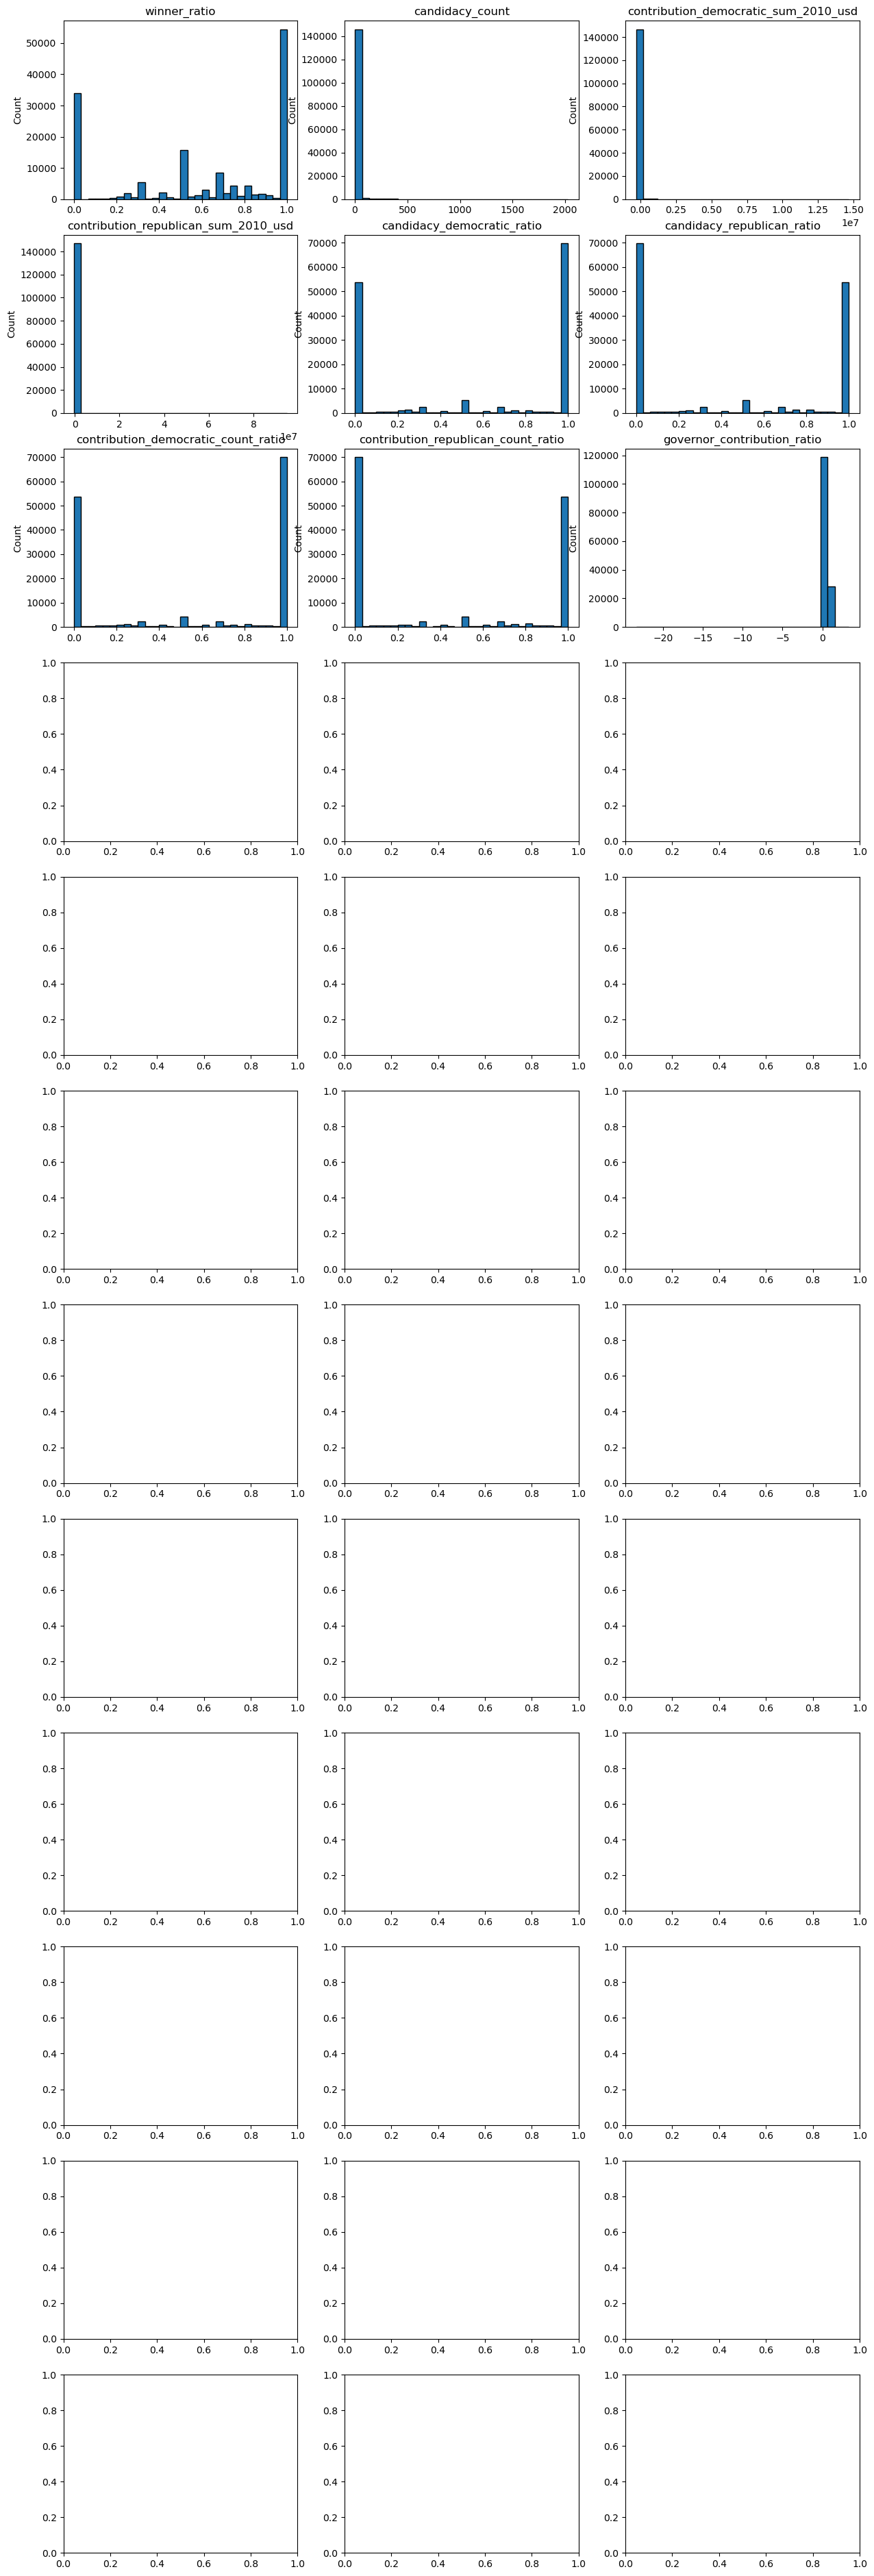

In [82]:
import matplotlib.pyplot as plt

def plot_histograms(df, train_num_vars, bins=30, cols=3, figsize=(15, 4)):
    n = len(train_num_vars)
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1] * rows))
    axes = axes.flatten()
    
    for ax, col in zip(axes, train_num_vars):
        ax.hist(df[col].dropna(), bins=bins, edgecolor='black')
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('Count')
    
    # remove any unused subplots
    for ax in axes[n:]:
        fig.delaxes(ax)
    
    plt.tight_layout()
    plt.show()
    
plot_histograms(train, train_num_vars)


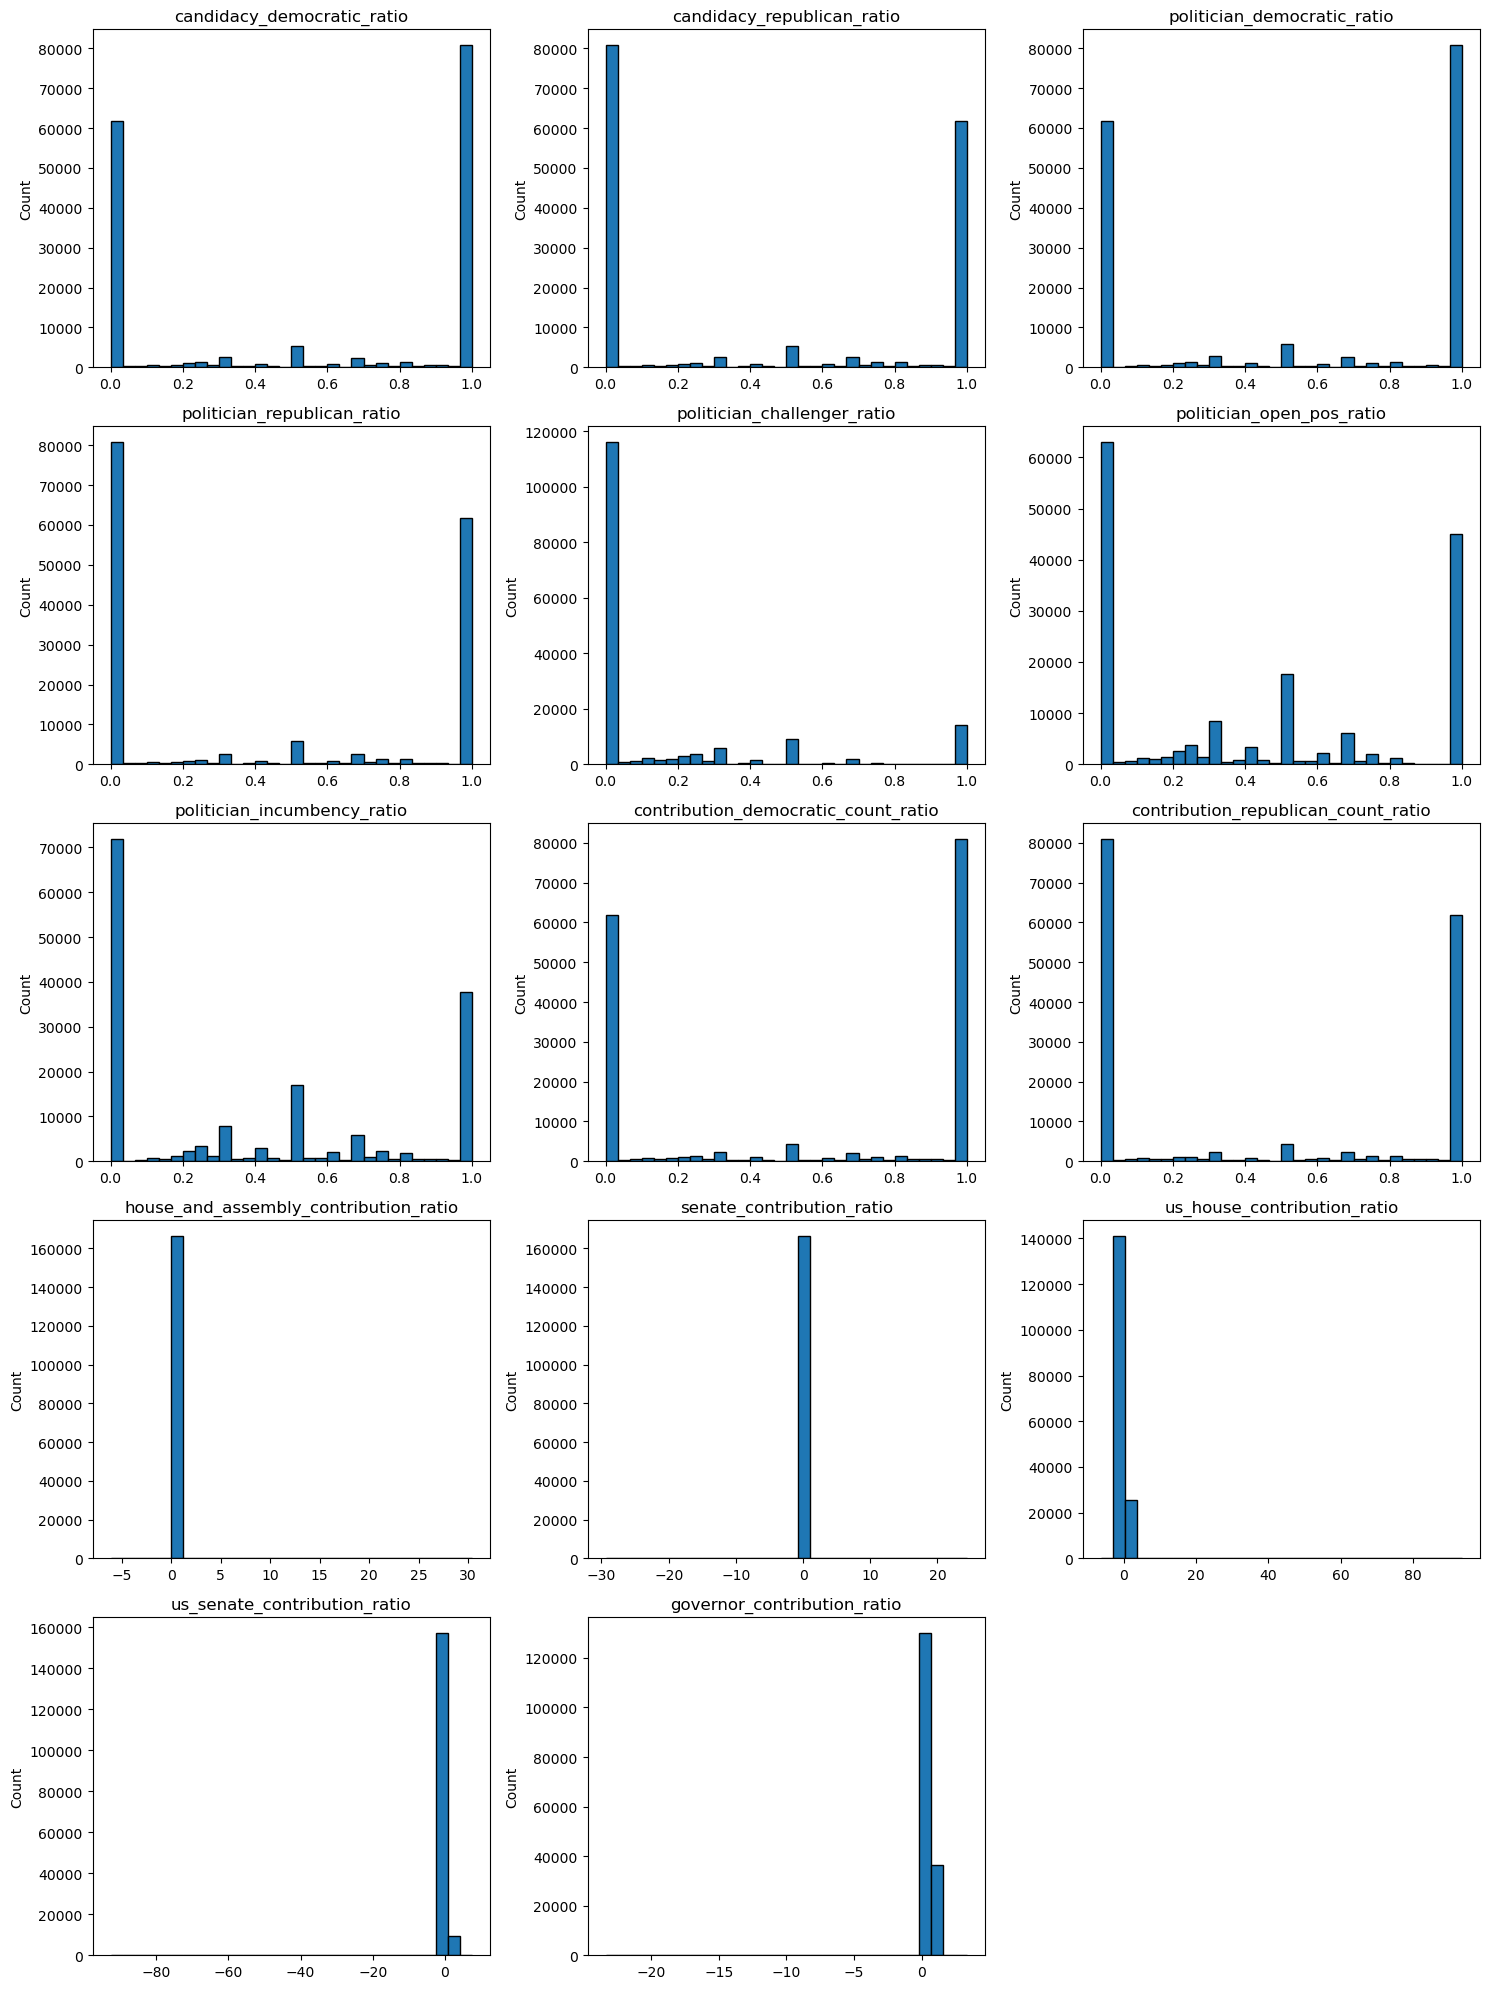

In [99]:

plot_histograms(train, ratio_cols)


## Treat ratio columns to fix skewness or zero and 1 inflated data

In [83]:
import numpy as np
import pandas as pd


THRESH = 0.10
target = "winner_ratio"

# ── 1) Correlation on raw ratios ───────────────────────────────────────
corr_df = train[ratio_cols + [target]].corr(method='spearman')
spearman = corr_df[target].abs().drop(target)

# pick those above threshold
selected_raw = spearman[spearman > THRESH].index.tolist()
print("Keeping these ratio_cols (|ρ| > 0.10):", selected_raw)

# ── 2) Engineer flags/logits only for selected ratios ──────────────────
EPS = 1e-4
def engineer_selected(df, selected):
    out = df.copy()
    for col in selected:
        out[f"{col}_is_zero"] = (out[col] <= 0).astype('int8')
        out[f"{col}_is_one"]  = (out[col] >= 1).astype('int8')
        # logit for all linear/tree/nn — adjust if you want only some
        clip = out[col].clip(EPS, 1-EPS)
        out[f"{col}_logit"] = np.log(clip / (1-clip))
    # drop **all** raw ratio columns
    out.drop(columns=ratio_cols, inplace=True)
    return out

train = engineer_selected(train, selected_raw)
test = engineer_selected(test, selected_raw)

selected_spearman = spearman[ spearman.abs() > THRESH ]\
                         .sort_values(ascending=False)

print("Selected ratio_cols with |Spearman ρ| >", THRESH)
print(selected_spearman.to_frame(name='spearman_rho'))


# ── 3) Drop any engineered columns from the unselected ratios ─────────
#    (shouldn’t be any, because engineer_selected only touches `selected_raw`)
#    but if you re‑ran on full set, you could do:
to_drop = []
for col in ratio_cols:
    if col not in selected_raw:
        to_drop += [c for c in train.columns if c.startswith(col)]
train.drop(columns=to_drop, inplace=True)

test.drop(columns=to_drop, inplace=True)
# ── 4) Now linear_df contains:
#    • flags and logits for only your important ratios
#    • all other original columns (categoricals + other numerics)

print(" \n\n","Final columns after ratio selection:")
print(train.columns.tolist())



Keeping these ratio_cols (|ρ| > 0.10): ['politician_challenger_ratio', 'politician_open_pos_ratio', 'politician_incumbency_ratio', 'governor_contribution_ratio']
Selected ratio_cols with |Spearman ρ| > 0.1
                             spearman_rho
politician_incumbency_ratio      0.504934
politician_challenger_ratio      0.337195
politician_open_pos_ratio        0.260724
governor_contribution_ratio      0.133137
 

 Final columns after ratio selection:
['state', 'contributor_type', 'winner_ratio', 'candidacy_count', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm', 'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm', 'general_sector_new', 'politician_challenger_ratio_is_zero', 'politician_challenger_ratio_is_one',

In [23]:
## Remove those columns from list
selected_ratio_cols = selected_spearman.index.tolist()

# 3) Compute which ratios to discard
discarded_ratio_cols = [c for c in ratio_cols if c not in selected_ratio_cols]
print("Discarding these ratio columns from train_num_vars:", discarded_ratio_cols)

# 4) Filter train_num_vars
train_num_vars = [c for c in train_num_vars if c not in discarded_ratio_cols]
test_num_vars = [col for col in test_num_vars if col not in discarded_ratio_cols]



Discarding these ratio columns from train_num_vars: ['candidacy_democratic_ratio', 'candidacy_republican_ratio', 'politician_democratic_ratio', 'politician_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'house_and_assembly_contribution_ratio', 'senate_contribution_ratio', 'us_house_contribution_ratio', 'us_senate_contribution_ratio']


In [84]:
set(train.columns) - set(test.columns)

set()

In [85]:
train.columns

Index(['state', 'contributor_type', 'winner_ratio', 'candidacy_count',
       'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contrib_state_deg',
       'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
       'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr',
       'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr',
       'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr',
       'state_win_comm', 'general_sector_new',
       'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_challenger_ratio_logit',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_is_zero',
       'governor_contribution_ratio_is_o

###  dropping winner ratio from test:

In [ ]:
#  dropping winner ratio from test:
test.drop(columns=["winner_ratio"], inplace=True)

In [86]:
import numpy as np
import pandas as pd

def create_feature_lists(df: pd.DataFrame,
                         target: str = "winner_ratio"):
    
    # 1) logit columns
    logit_vars = [c for c in df.columns if c.endswith("_logit")]

    # 2) binary‑flag columns
    binary_flag_vars = [c for c in df.columns
                        if c.endswith("_is_zero") or c.endswith("_is_one")]

    # 3) numeric columns (ints & floats)
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # 5) train_num_vars: all numeric except target, cat_vars, binary_flag_vars
    train_num_vars = [
        c for c in num_cols
        if c not in binary_flag_vars + [target]
    ]

    return {
        "logit_vars":       logit_vars,
        "binary_flag_vars": binary_flag_vars,
        "tar_var":          target,
        "train_num_vars":   train_num_vars
    }

# Example usage:
features = create_feature_lists(train)
features["cat_vars"] = cat_vars
print("Logit vars:      ", features["logit_vars"])
print("Binary flags:    ", features["binary_flag_vars"])
print("Categoricals:    ", features["cat_vars"])
print("Target:          ", features["tar_var"])
print("Numeric features:", features["train_num_vars"])



Logit vars:       ['politician_challenger_ratio_logit', 'politician_open_pos_ratio_logit', 'politician_incumbency_ratio_logit', 'governor_contribution_ratio_logit']
Binary flags:     ['politician_challenger_ratio_is_zero', 'politician_challenger_ratio_is_one', 'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one', 'politician_incumbency_ratio_is_zero', 'politician_incumbency_ratio_is_one', 'governor_contribution_ratio_is_zero', 'governor_contribution_ratio_is_one']
Categoricals:     ['general_sector', 'specific_sector', 'state', 'contributor_type', 'general_sector_new']
Target:           winner_ratio
Numeric features: ['candidacy_count', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm', 'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm', 'state_win_deg', 'state_w

### Treat Network data columns

In [87]:
features["cat_vars"]

['general_sector',
 'specific_sector',
 'state',
 'contributor_type',
 'general_sector_new']

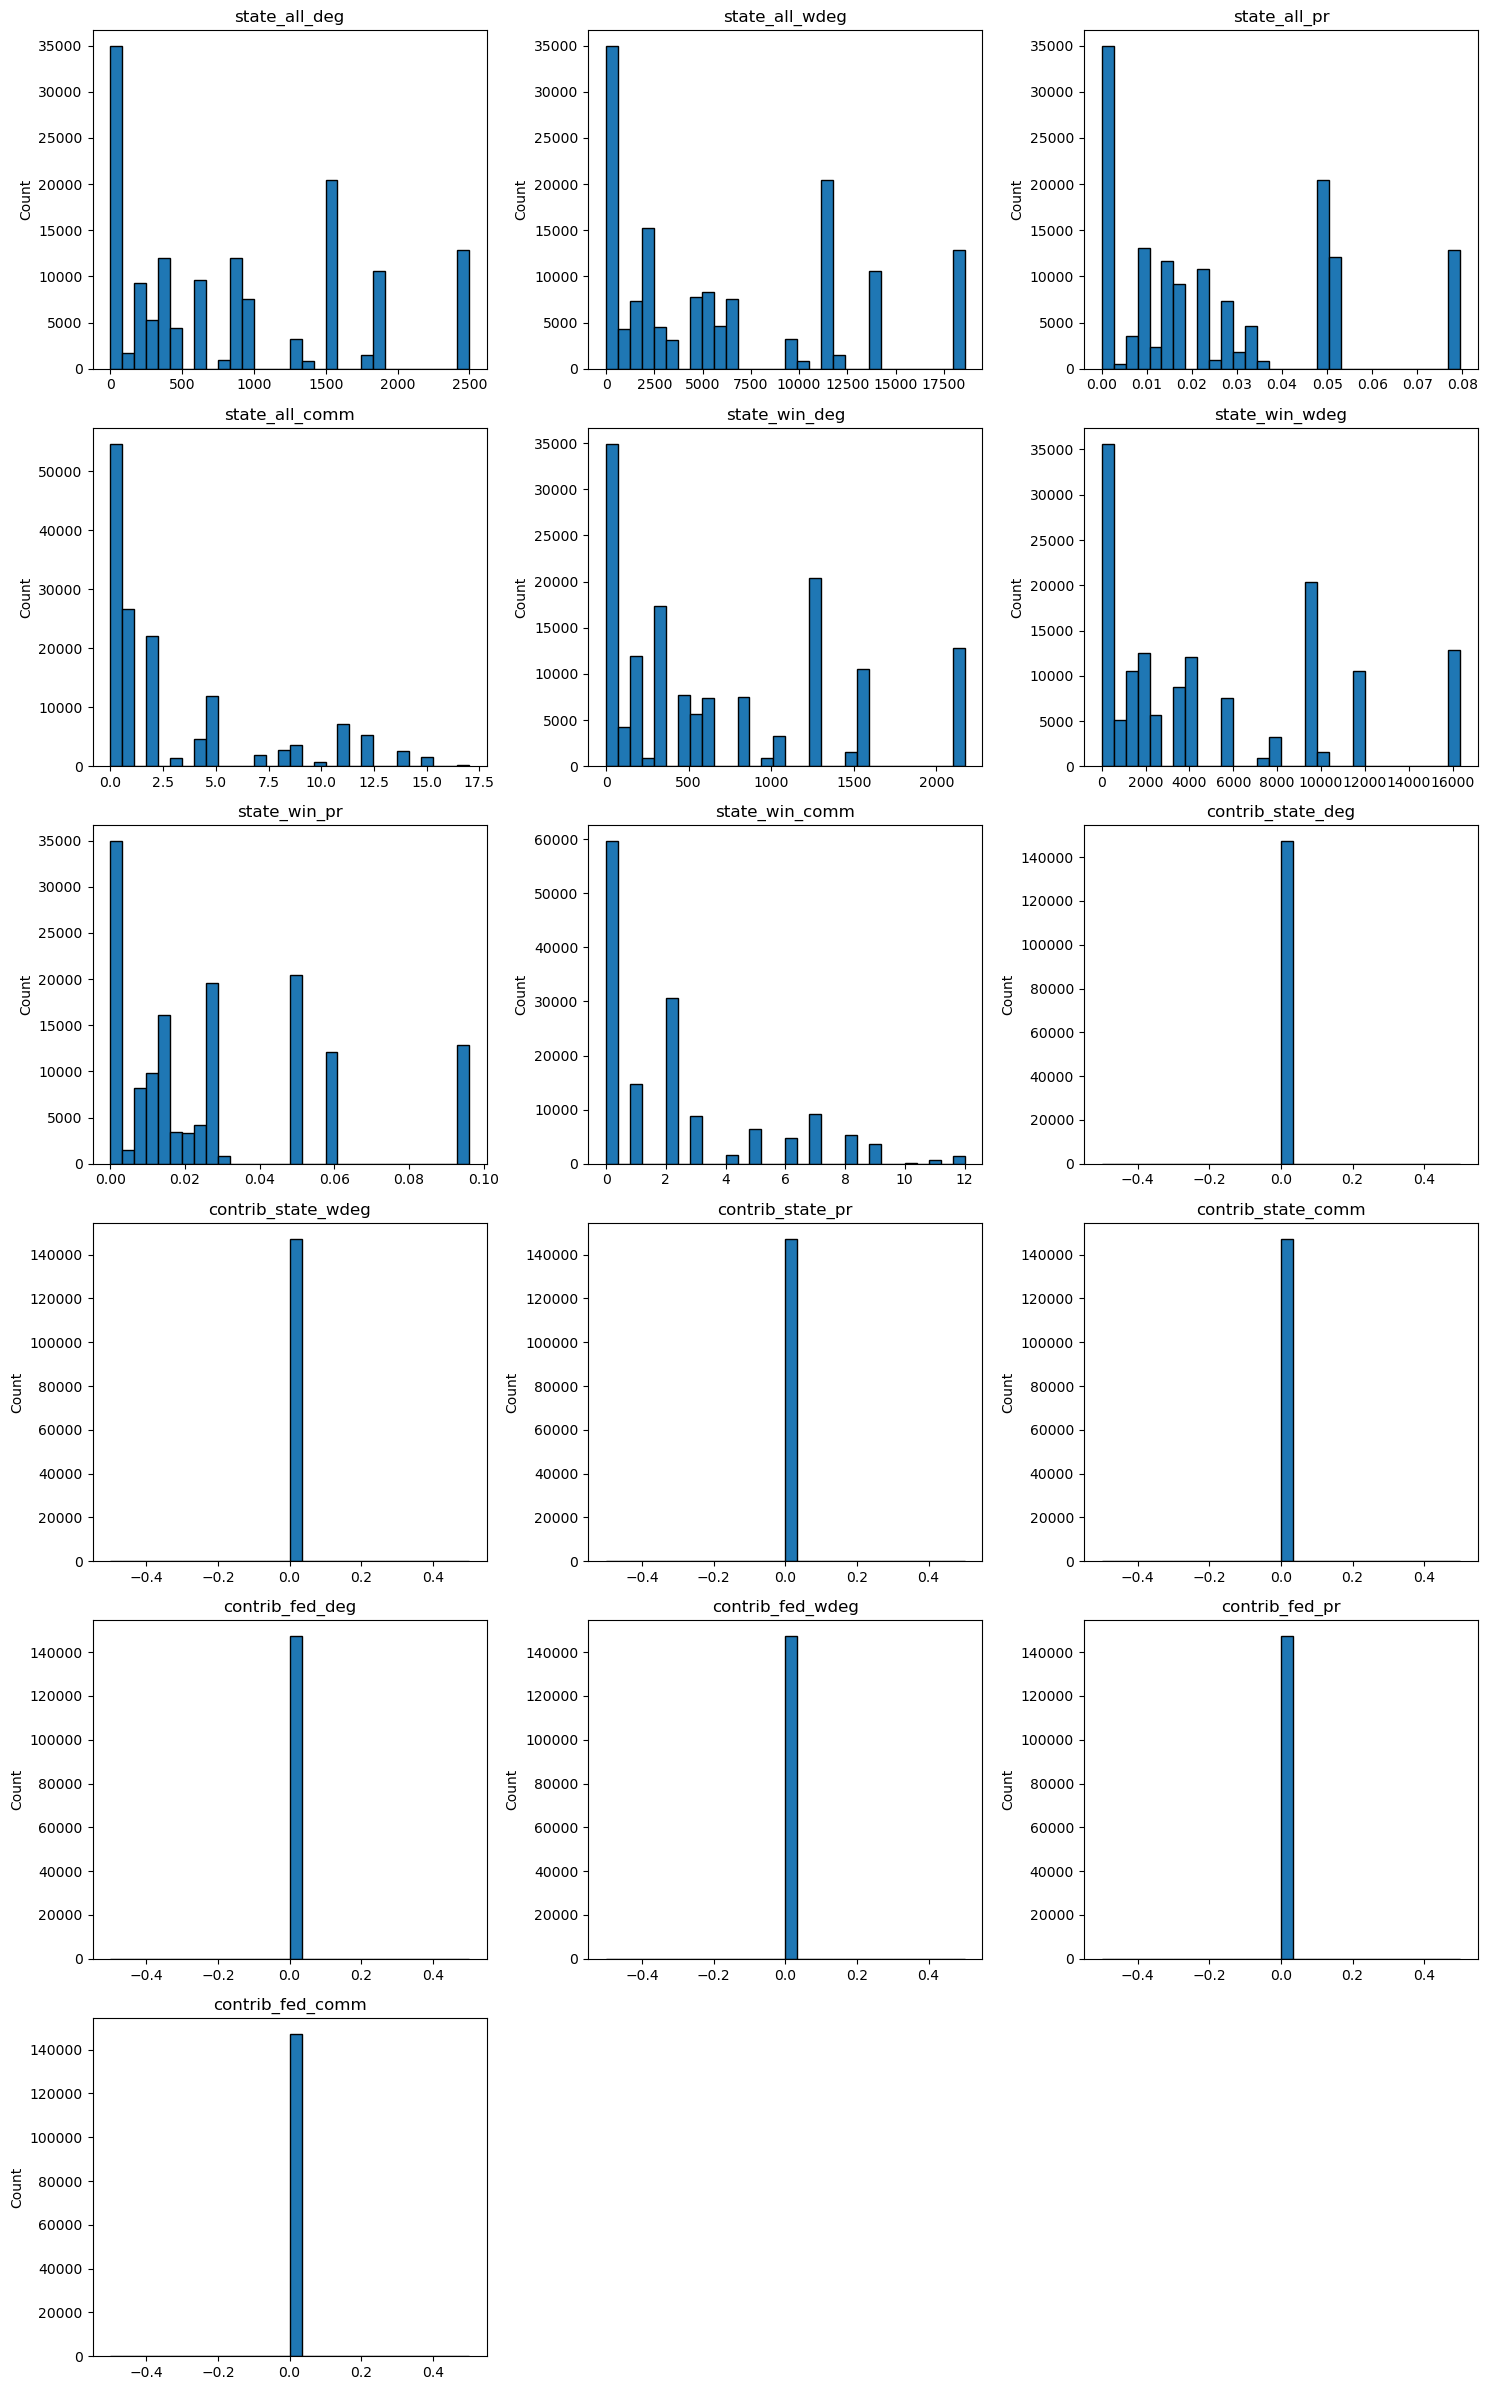

In [88]:

network_cols = [
    'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm',
    'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm',
    'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
    'contrib_fed_deg',  'contrib_fed_wdeg',  'contrib_fed_pr',  'contrib_fed_comm'
]

plot_histograms(train, network_cols)


In [89]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer



# ---------------------------------
# 2. Drop columns with zero variance
# ---------------------------------
non_constant = [c for c in network_cols if train[c].std(skipna=True) > 0]
print(f"Dropping {len(network_cols) - len(non_constant)} constant columns")

# ---------------------------------
# 3. Apply a skew‑reducing transform
#    a) log1p  (good for strictly‑positive features with many zeros)
#    b) Yeo‑Johnson (handles negatives too; uncomment if needed)
# ---------------------------------
X = train[non_constant].copy()

# a) log1p
X_log  = np.log1p(X)

# b) Yeo‑Johnson – uncomment if you have negatives
# pt     = PowerTransformer(method="yeo-johnson", standardize=False)
# X_log  = pd.DataFrame(pt.fit_transform(X), columns=non_constant, index=train.index)

# ---------------------------------
# 4. Correlation with the target
# ---------------------------------
y = train['winner_ratio']

pearson  = X_log.apply(lambda col: col.corr(y, method='pearson')).sort_values(ascending=False)
spearman = X.apply  (lambda col: col.corr(y, method='spearman')).sort_values(ascending=False)

print("\n=== Pearson (after log1p) ===")
print(pearson)

print("\n=== Spearman (rank‑based, raw values) ===")


print(spearman)


Dropping 8 constant columns

=== Pearson (after log1p) ===
state_win_comm    0.008611
state_all_wdeg   -0.003891
state_win_wdeg   -0.004354
state_all_comm   -0.005374
state_all_deg    -0.005857
state_win_deg    -0.006435
state_win_pr     -0.030505
state_all_pr     -0.036375
dtype: float64

=== Spearman (rank‑based, raw values) ===
state_win_comm    0.012642
state_win_wdeg   -0.001595
state_all_deg    -0.001699
state_win_deg    -0.002127
state_all_wdeg   -0.002286
state_win_pr     -0.006967
state_all_pr     -0.010494
state_all_comm   -0.011778
dtype: float64


In [90]:
from sklearn.preprocessing import PowerTransformer

# 1) fit Yeo-Johnson
pt = PowerTransformer(method="yeo-johnson", standardize=False)
X_yeo = pd.DataFrame(pt.fit_transform(train[non_constant]),
                     columns=non_constant, index=train.index)

# 2) Pearson corr on Yeo‑Johnson
pearson_yeo = X_yeo.apply(lambda col: col.corr(train['winner_ratio'], method='pearson'))
print("Pearson after Yeo‑Johnson:\n", pearson_yeo.sort_values(ascending=False))


Pearson after Yeo‑Johnson:
 state_win_comm    0.006768
state_all_comm   -0.013528
state_win_wdeg   -0.017951
state_all_wdeg   -0.018246
state_win_deg    -0.018946
state_all_deg    -0.019674
state_win_pr     -0.034839
state_all_pr     -0.037173
dtype: float64


#### Dropping network related metrics, since they're found to be very less correlated with winner_ratio

In [91]:
train.drop(network_cols, axis=1, inplace= True)
test.drop(network_cols, axis=1, inplace= True)

In [92]:
for col in network_cols:
    features['train_num_vars'].remove(col)
    # features['test_num_vars'].remove(col)

In [93]:
train['contribution_total_sum_2010_usd'] = train['contribution_democratic_sum_2010_usd'] + train['contribution_republican_sum_2010_usd']
test['contribution_total_sum_2010_usd'] = test['contribution_democratic_sum_2010_usd'] + test['contribution_republican_sum_2010_usd']

features['train_num_vars'].append("contribution_total_sum_2010_usd")
# features['test_num_vars'].append("contribution_total_sum_2010_usd")

In [94]:
def dropZeroRecords(df, cols):
    for col in cols:
        print(f'# Zero records in {col} are {df[df[col]==0 ].shape}')
        df = df[df[col]>0]
    return df

cols = ["contribution_total_sum_2010_usd"]
train = dropZeroRecords(train, cols)
# test = dropZeroRecords(train, cols)

# Zero records in contribution_total_sum_2010_usd are (133, 20)


In [96]:
#for test sane function but without dropping records replace with 0.1:
def test_sane_function(test, cols):
    for col in cols:
        test[col] = test[col].replace(0, 0.1)
    return test
cols = ["contribution_total_sum_2010_usd"]
test = test_sane_function(test, cols)

In [97]:
def dropNegRecords(df, col):
    for col in cols:
        print(f'# Neg records in {col} are {df[df[col]<0 ].shape}')
        df = df[df[col]>0]
    return df

cols = ["contribution_democratic_sum_2010_usd", "contribution_republican_sum_2010_usd"]
train = dropNegRecords(train, cols)
print("\n\n")
#REplace negative values with 0.1 in test:
def test_sane_function(test, cols):
    for col in cols:
        test[col] = test[col].replace(0, 0.1)
    return test
cols = ["contribution_democratic_sum_2010_usd", "contribution_republican_sum_2010_usd"]
test = test_sane_function(test, cols)

# Neg records in contribution_democratic_sum_2010_usd are (23, 20)
# Neg records in contribution_republican_sum_2010_usd are (35, 20)





In [98]:
import numpy as np
import pandas as pd

money_sums = [
    "contribution_democratic_sum_2010_usd",
    "contribution_republican_sum_2010_usd",
    "contribution_total_sum_2010_usd",
]

def add_share_features(df, money_sums, eps=1e-6):
    # 1) raw sums → log (we dropped total_sum zeros upstream)
    for col in money_sums:
        df[f"{col}_log"] = np.log1p(df[col])
    
    # 2) zero‐flags only for dem & rep sums
    for col in money_sums[:-1]:  # skip the total_sum
        df[f"{col}_is_zero"] = (df[col] == 0).astype(int)

    # 3) compute share ratios directly
    df["dem_sum_ratio"] = (
        df["contribution_democratic_sum_2010_usd"]
        / df["contribution_total_sum_2010_usd"]
    )
    df["rep_sum_ratio"] = (
        df["contribution_republican_sum_2010_usd"]
        / df["contribution_total_sum_2010_usd"]
    )

    # 4) flags for ratio boundaries
    df["dem_sum_ratio_is_zero"] = (df["dem_sum_ratio"] == 0).astype(int)
    df["dem_sum_ratio_is_one"]  = (df["dem_sum_ratio"] == 1).astype(int)
    df["rep_sum_ratio_is_zero"] = (df["rep_sum_ratio"] == 0).astype(int)
    df["rep_sum_ratio_is_one"]  = (df["rep_sum_ratio"] == 1).astype(int)

    # 5) logit‐transform the ratios (safe since denom≠0)
    for col in ["dem_sum_ratio", "rep_sum_ratio"]:
        r = df[col].clip(eps, 1 - eps)
        df[f"{col}_logit"] = np.log(r / (1 - r))

    return df

# Apply to both train and test (after you’ve dropped total_sum == 0 rows)
train = add_share_features(train, money_sums)
test  = add_share_features(test,  money_sums)


/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [99]:
features['cat_vars']

['general_sector',
 'specific_sector',
 'state',
 'contributor_type',
 'general_sector_new']

In [100]:
# Linear or GLM (no penalty)
linear_keep = [
    "contribution_total_sum_2010_usd_log",
    "dem_sum_ratio_logit",
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",
]

# Linear with Ridge/Lasso
linear_keep_penalised = [
    # 1) magnitude of money (compressed)
    "contribution_democratic_sum_2010_usd_log",
    "contribution_republican_sum_2010_usd_log",
    "contribution_total_sum_2010_usd_log",

     # 2) wasn’t zero? (flag)
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",

    # 3) partisan dollar share (dem only), logit‐transformed
    "dem_sum_ratio_logit",
    
]

# Tree‑based
tree_keep = [
    # 1. raw sums — trees love them
    "contribution_democratic_sum_2010_usd",
    "contribution_republican_sum_2010_usd",
    "contribution_total_sum_2010_usd",
    # 2. raw share ratio
    "dem_sum_ratio",
]

# Neural network (after StandardScaler)
nn_keep = [
    "contribution_democratic_sum_2010_usd_log",
    "contribution_republican_sum_2010_usd_log",
    "contribution_total_sum_2010_usd_log",
    "dem_sum_ratio",
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",
]

features_keep_penalised = create_feature_lists(train)
features["train_num_vars"] += [col for col in features_keep_penalised["train_num_vars"]
                               if col not in features["train_num_vars"]]

features["binary_flag_vars"] += [col for col in features_keep_penalised["binary_flag_vars"]
                               if col not in features["binary_flag_vars"]]

features["logit_vars"] += [col for col in features_keep_penalised["logit_vars"]
                               if col not in features["logit_vars"]]


# features_tree   = create_feature_lists(train)
# features["train_num_vars"] += tree_keep['train_num_vars']


# features_nn     = create_feature_lists(train)
# features["train_num_vars"] += nn_keep['train_num_vars']



In [101]:
'dem_sum_ratio' in features['train_num_vars'],  'rep_sum_ratio' in features['train_num_vars']

(True, True)

In [102]:
## Dropping redundance columns

def drop_extra_cols(df, features, cols):
    features["train_num_vars"] = [c for c in features["train_num_vars"] if c not in cols]
    df.drop(columns=[c for c in cols if c in df.columns], inplace=True)
    return df, features


cols = ["dem_sum_ratio", "rep_sum_ratio"]


train, features = drop_extra_cols(train, features, cols)
test, features = drop_extra_cols(test, features, cols)
  

In [103]:
'dem_sum_ratio' in features['train_num_vars']

False

In [104]:
'dem_sum_ratio' in features['train_num_vars']

False

In [105]:
train.columns

Index(['state', 'contributor_type', 'winner_ratio', 'candidacy_count',
       'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'general_sector_new',
       'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_challenger_ratio_logit',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_is_zero',
       'governor_contribution_ratio_is_one',
       'governor_contribution_ratio_logit', 'contribution_total_sum_2010_usd',
       'contribution_democratic_sum_2010_usd_log',
       'contribution_republican_sum_2010_usd_log',
       'contribution_total_sum_2010_usd_log',
       'contribution_democratic_sum_2010_usd_is_zero',
       'contribution_republican_sum_2010_usd_is_

In [106]:
set(features["train_num_vars"] + features["cat_vars"] + features["binary_flag_vars"] ) -set(train.columns)

{'general_sector', 'specific_sector'}

In [107]:
set(train.columns) - set(features["train_num_vars"] + features["cat_vars"] + features["binary_flag_vars"] ) 

{'winner_ratio'}

In [108]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histograms(df, cols, bins=30, cols_per_row=3, figsize=(15, 4), wide_range_factor=100):
   
    n = len(cols)
    rows = (n + cols_per_row - 1) // cols_per_row
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(figsize[0], figsize[1]*rows), squeeze=False)
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        data = df[col].dropna()
        # drop non-finite
        data = data[np.isfinite(data)]
        if data.empty:
            ax.set_title(f"{col}\n(no data)")
            continue

        mn, mx = data.min(), data.max()

        # decide linear vs log
        if mn >= 0 and mx/mn if mn>0 else np.inf > wide_range_factor:
            # log‐scale histogram
            # protect against zeros by starting at a small positive epsilon
            low = mn if mn>0 else data[data>0].min()
            edges = np.logspace(np.log10(low), np.log10(mx), bins)
            ax.hist(data, bins=edges, edgecolor='black')
            ax.set_xscale('log')
            ax.set_title(f"{col}\n(log scale)")
        else:
            # linear histogram
            ax.hist(data, bins=bins, range=(mn, mx), edgecolor='black')
            ax.set_title(col)

        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=30)

    # remove any extra subplots
    for ax in axes[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()


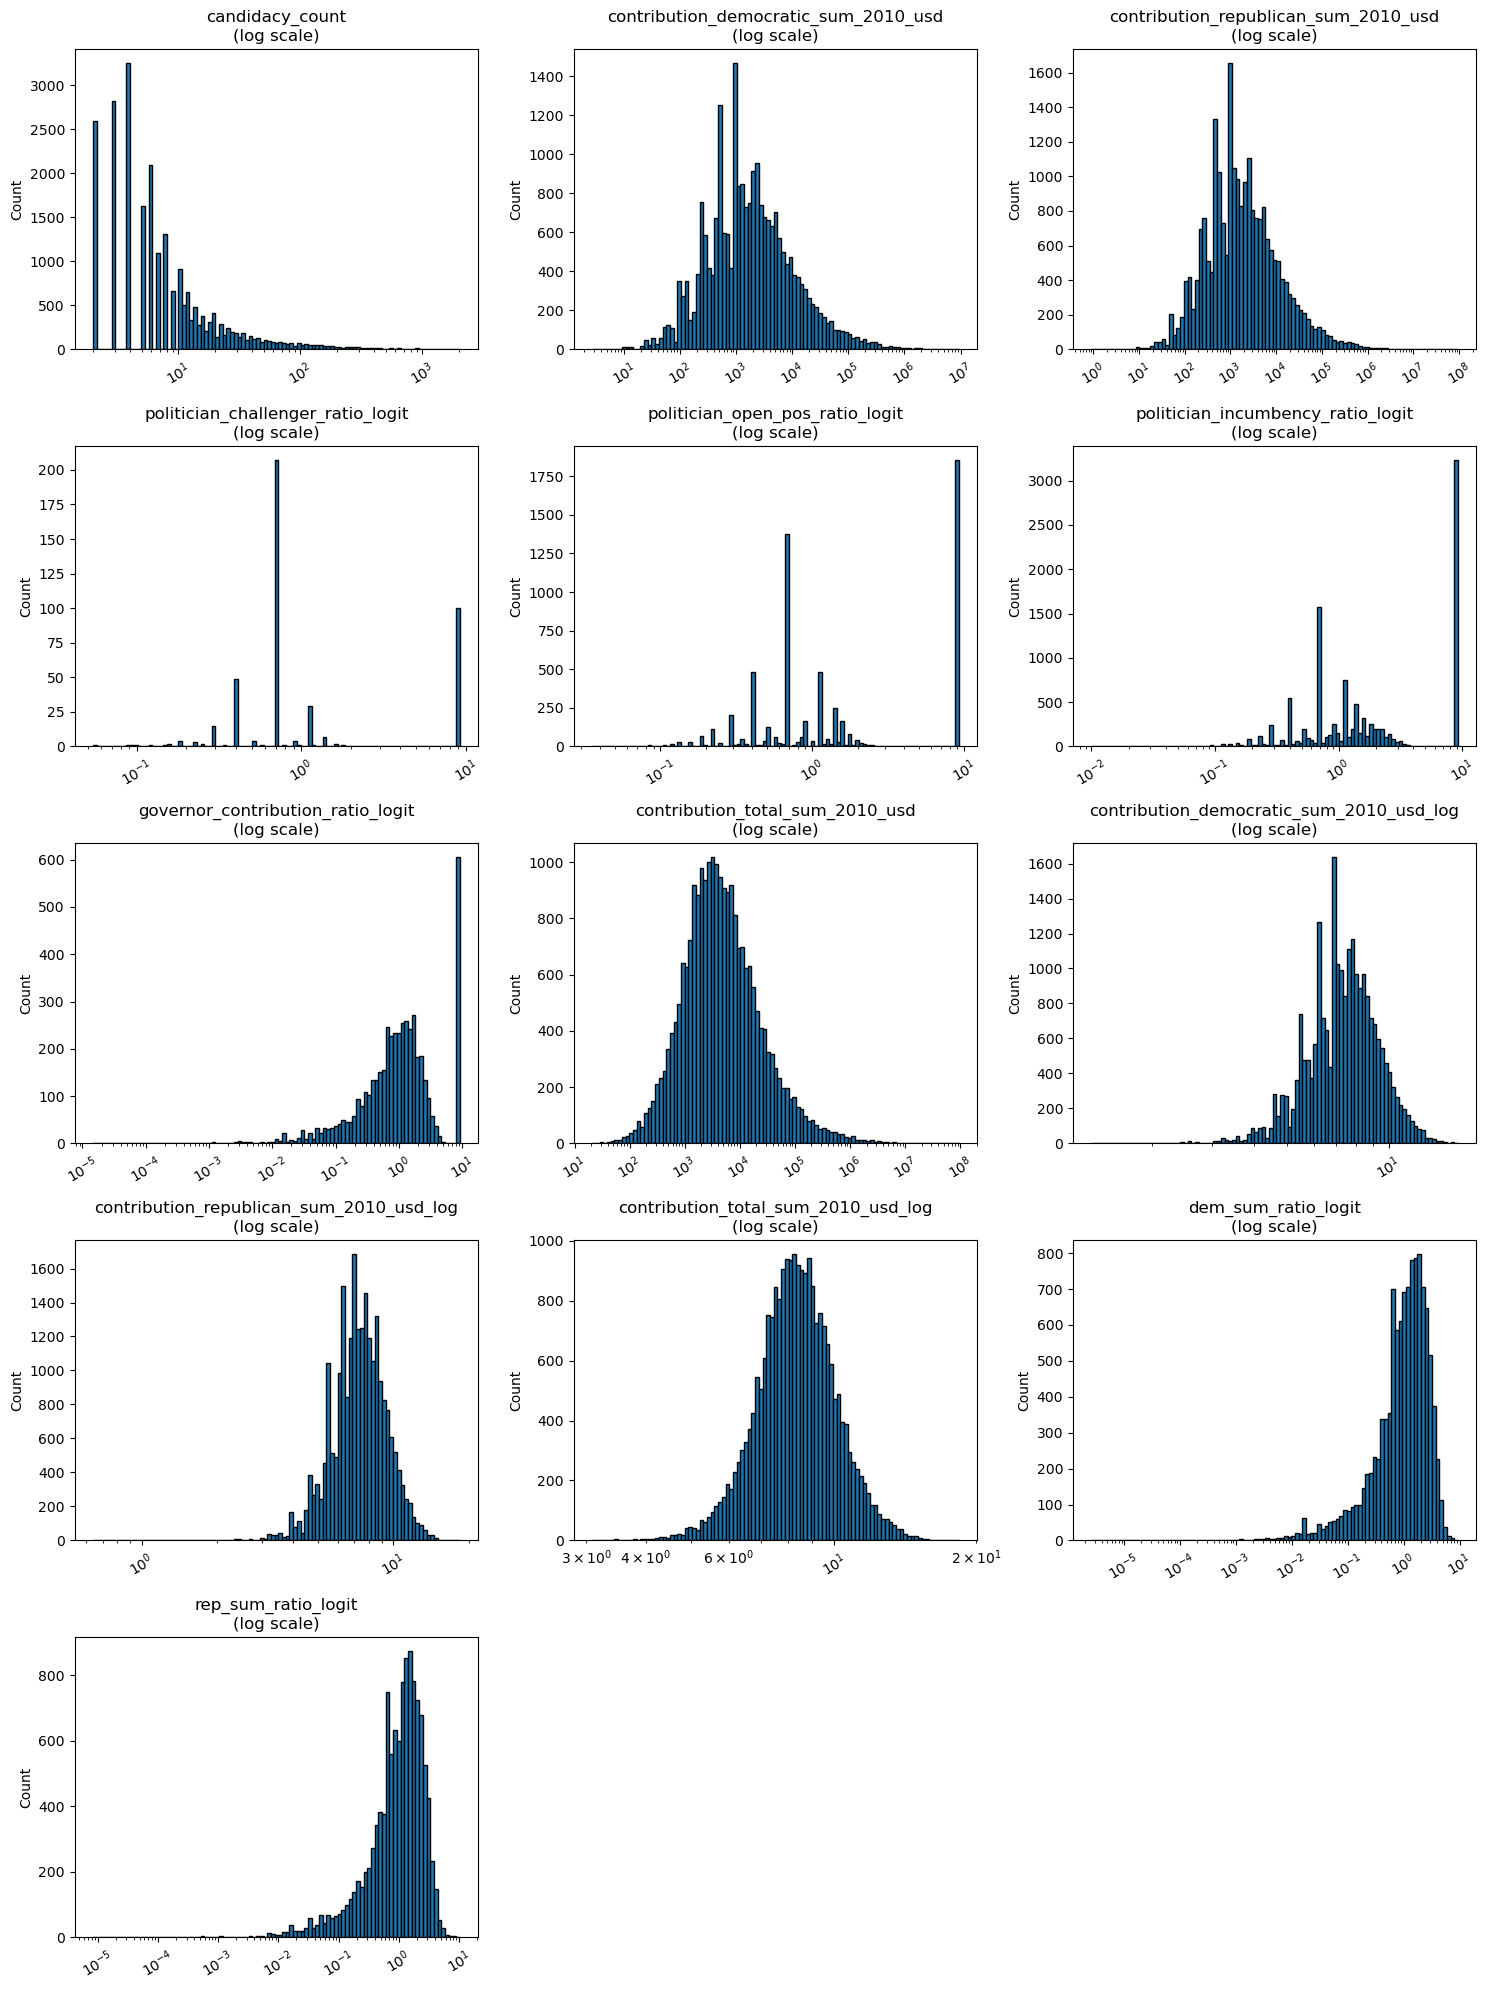

In [109]:


plot_histograms(train, features['train_num_vars'], bins=100, cols_per_row=3, figsize=(15, 4), wide_range_factor=100)

## Check skewness in features

In [111]:
import numpy as np
from scipy.stats import skew

# 1) List all nonnegative columns you’d like to check
to_check = [
    'contribution_democratic_sum_2010_usd',"contribution_republican_sum_2010_usd",
    'contribution_total_sum_2010_usd'
]

# 2) Compute & print pre‑log1p skewness
print("Pre‑log1p skewness:")
pre = {c: skew(train[c].dropna()) for c in features['train_num_vars']}
for c,v in pre.items():
    print(f"  {c:20s}  {v:6.3f}")



Pre‑log1p skewness:
  candidacy_count       10.923
  contribution_democratic_sum_2010_usd  32.491
  contribution_republican_sum_2010_usd  118.476
  politician_challenger_ratio_logit   0.635
  politician_open_pos_ratio_logit   0.056
  politician_incumbency_ratio_logit  -0.068
  governor_contribution_ratio_logit   0.545
  contribution_total_sum_2010_usd  106.960
  contribution_democratic_sum_2010_usd_log   0.453
  contribution_republican_sum_2010_usd_log   0.506
  contribution_total_sum_2010_usd_log   0.582
  dem_sum_ratio_logit    0.104
  rep_sum_ratio_logit   -0.104


### Drop actual contribution_sum columns for both REP and DEM

In [112]:

cols_to_drop = ['contribution_democratic_sum_2010_usd','contribution_republican_sum_2010_usd','contribution_total_sum_2010_usd']

train, features = drop_extra_cols(train, features, cols_to_drop)
test, features = drop_extra_cols(test, features, cols_to_drop)

## Check VIF among numerical columns

In [113]:
# 2) Compute VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train[features['train_num_vars']].dropna().astype(float)
vif_data = pd.DataFrame({
    "feature": features['train_num_vars'], 
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print("\nVariance Inflation Factors:")
print(vif_data.sort_values("VIF", ascending=False))


Variance Inflation Factors:
                                    feature           VIF
8                       dem_sum_ratio_logit           inf
9                       rep_sum_ratio_logit           inf
6  contribution_republican_sum_2010_usd_log  8.489646e+05
5  contribution_democratic_sum_2010_usd_log  8.445916e+05
7       contribution_total_sum_2010_usd_log  4.933894e+02
1         politician_challenger_ratio_logit  4.008600e+00
2           politician_open_pos_ratio_logit  3.643400e+00
3         politician_incumbency_ratio_logit  3.313337e+00
4         governor_contribution_ratio_logit  2.087600e+00
0                           candidacy_count  1.342209e+00


/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


## Check correlation of numerical variables with target variable

In [114]:

# Calculate correlations
correlations = train[features['train_num_vars']].corrwith(train['winner_ratio']).sort_values(key=abs, ascending=False)

# Display top correlations
print("🔍 Correlation of Predictors with winner_ratio:")
print(correlations)

🔍 Correlation of Predictors with winner_ratio:
politician_incumbency_ratio_logit           0.535897
politician_open_pos_ratio_logit            -0.366150
politician_challenger_ratio_logit          -0.258242
contribution_republican_sum_2010_usd_log    0.254183
contribution_total_sum_2010_usd_log         0.251771
governor_contribution_ratio_logit          -0.229787
contribution_democratic_sum_2010_usd_log    0.204313
candidacy_count                             0.134812
rep_sum_ratio_logit                         0.061422
dem_sum_ratio_logit                        -0.061422
dtype: float64


In [52]:
# Compute Spearman correlation between each train_num_var and the target
spearman = train[features["train_num_vars"]].apply(
    lambda col: col.corr(train["winner_ratio"], method="spearman")
).sort_values(ascending=False)

spearman


politician_incumbency_ratio_logit           0.597792
contribution_republican_sum_2010_usd_log    0.223642
contribution_total_sum_2010_usd_log         0.216085
candidacy_count                             0.186878
contribution_democratic_sum_2010_usd_log    0.168263
rep_sum_ratio_logit                         0.068201
dem_sum_ratio_logit                        -0.068200
governor_contribution_ratio_logit          -0.245674
politician_challenger_ratio_logit          -0.292907
politician_open_pos_ratio_logit            -0.436844
dtype: float64

In [53]:
cols_to_drop_later = ['dem_sum_ratio_logit']

In [115]:
train_bkp = train.copy()
test_bkp = test.copy()

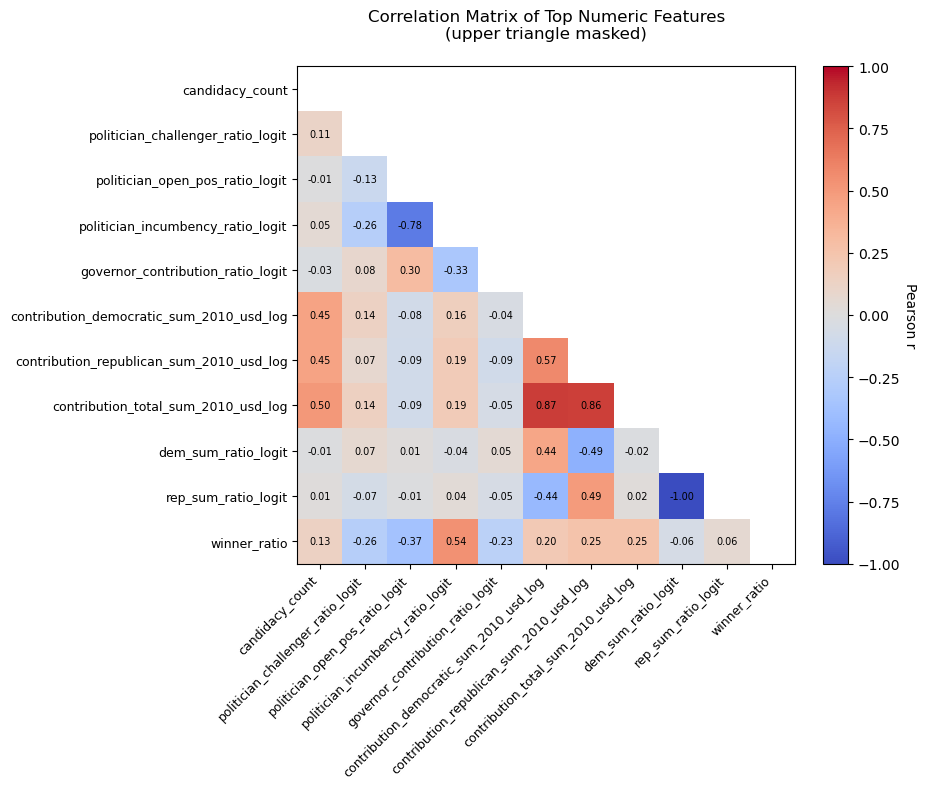

In [116]:
import matplotlib.pyplot as plt


train_num_vars = features['train_num_vars'] + [features['tar_var']]

# 2) Compute the correlation matrix
corr = train[train_num_vars].corr()

# 3) Build a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# 4) Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap, masking out the upper triangle
cmap = plt.get_cmap('coolwarm')
im = ax.imshow(np.ma.masked_where(mask, corr), 
               cmap=cmap, vmin=-1, vmax=1)

# Set tick labels
ax.set_xticks(np.arange(len(train_num_vars)))
ax.set_yticks(np.arange(len(train_num_vars)))
ax.set_xticklabels(train_num_vars, rotation=45, ha='right', fontsize=9)
ax.set_yticklabels(train_num_vars, fontsize=9)

# Annotate each cell in the lower triangle with its correlation value
for i in range(len(train_num_vars)):
    for j in range(len(train_num_vars)):
        if not mask[i, j]:  # only annotate lower triangle
            val = corr.iloc[i, j]
            ax.text(j, i, f"{val:.2f}", ha='center', va='center',
                    color='black', fontsize=7)

# Add a colorbar
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Pearson r", rotation=270, labelpad=12)

ax.set_title("Correlation Matrix of Top Numeric Features\n(upper triangle masked)", pad=20)
plt.tight_layout()
plt.show()

### Pipeline to split data, encode categorical columns, and then model building

## Model training on transformed tar_var

In [118]:
train_bkp = train.copy()
test_bkp = test.copy()

In [119]:
train = train.copy()
test = test.copy()

# Logit  winner_ratio ->> XGBReg valMSE = 0.03795

[  0.00s] Loading & splitting data
[  0.02s] Starting GridSearchCV for XGB
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[ 24.91s] GridSearchCV done

▶ XGBRegressor val MSE = 0.03795



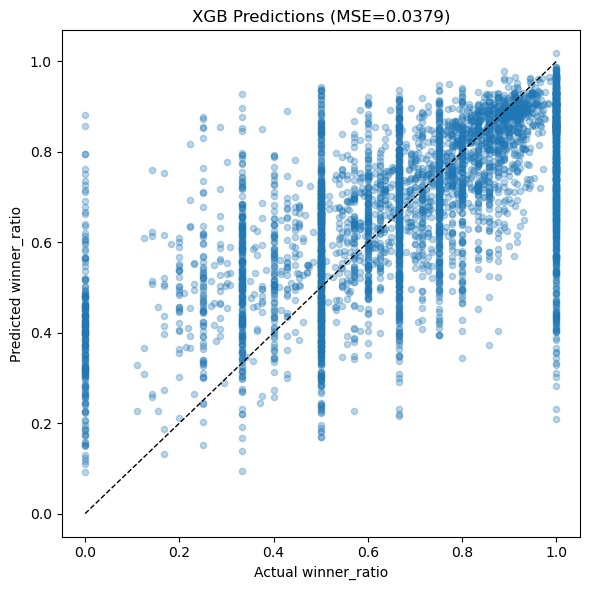

=== mean winner_ratio per bin (validation) ===
      bin   n  actual_mean  pred_mean
0.00–0.05 193       0.0000     0.4036
0.05–0.10   0          NaN        NaN
0.10–0.15  12       0.1331     0.4483
0.15–0.20  41       0.1884     0.4591
0.20–0.25  85       0.2453     0.4979
0.25–0.30  29       0.2859     0.5263
0.30–0.35 228       0.3331     0.5176
0.35–0.40 112       0.3923     0.5271
0.40–0.45  54       0.4329     0.5602
0.45–0.50 660       0.4984     0.5679
0.50–0.55  55       0.5372     0.6080
0.55–0.60 270       0.5864     0.6282
0.60–0.65 124       0.6287     0.6626
0.65–0.70 499       0.6700     0.6622
0.70–0.75 398       0.7390     0.6988
0.75–0.80 295       0.7877     0.7402
0.80–0.85 219       0.8304     0.7954
0.85–0.90 326       0.8753     0.8152
0.90–0.95 217       0.9233     0.8597
0.95–1.00 909       0.9982     0.7889


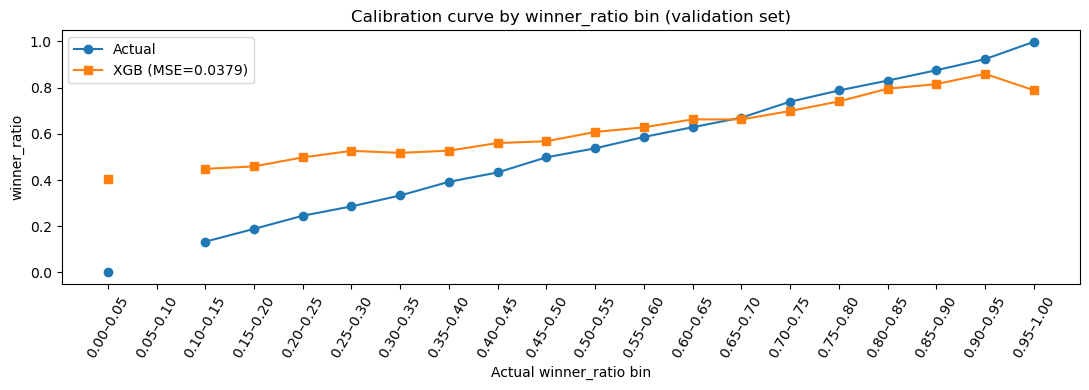

[ 25.25s] Done


In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import perf_counter

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing  import OneHotEncoder, StandardScaler
from sklearn.compose         import ColumnTransformer
from sklearn.pipeline        import Pipeline
from sklearn.metrics         import mean_squared_error

from xgboost import XGBRegressor

# ───────────────────────────────────────────────────────────────────────────────
# 0 · Timer (optional)
# ───────────────────────────────────────────────────────────────────────────────
t0 = perf_counter()
def tick(msg):
    print(f"[{perf_counter()-t0:6.2f}s] {msg}")

# ───────────────────────────────────────────────────────────────────────────────
# 1 · Load & split
# ───────────────────────────────────────────────────────────────────────────────
tick("Loading & splitting data")
# assume `train` is your DataFrame already in memory
y = train.pop("winner_ratio").values
X = train.copy()

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ───────────────────────────────────────────────────────────────────────────────
# 2 · Preprocessor
# ───────────────────────────────────────────────────────────────────────────────
pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", StandardScaler(),                     num_cols)
], sparse_threshold=0.3)

# ───────────────────────────────────────────────────────────────────────────────
# 3 · XGBoost pipeline + hyperparameter grid
# ───────────────────────────────────────────────────────────────────────────────
pipe_xgb = Pipeline([
    ("pre", pre),
    ("xgb", XGBRegressor(
        objective="reg:squarederror",
        random_state=42,
        verbosity=0
    ))
])

param_grid = {
    "xgb__n_estimators":    [200, 500],
    "xgb__learning_rate":   [0.01, 0.05],
    "xgb__max_depth":       [3, 5],
    "xgb__subsample":       [0.8, 1.0],
    "xgb__colsample_bytree":[0.8, 1.0],
}

tick("Starting GridSearchCV for XGB")
search = GridSearchCV(
    pipe_xgb,
    param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)
search.fit(X_tr, y_tr)
best = search.best_estimator_
tick("GridSearchCV done")

# ───────────────────────────────────────────────────────────────────────────────
# 4 · Validation performance
# ───────────────────────────────────────────────────────────────────────────────
y_pred_xgb = best.predict(X_val)
mse_xgb    = mean_squared_error(y_val, y_pred_xgb)
print(f"\n▶ XGBRegressor val MSE = {mse_xgb:.5f}\n")

# scatter plot
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred_xgb, alpha=0.3, s=20)
plt.plot([0,1],[0,1],"k--",lw=1)
plt.xlabel("Actual winner_ratio")
plt.ylabel("Predicted winner_ratio")
plt.title(f"XGB Predictions (MSE={mse_xgb:.4f})")
plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────────────────────────────────────
# 5 · Bin‑level calibration
# ───────────────────────────────────────────────────────────────────────────────
edges  = np.linspace(0, 1, 21)  # 20 bins
labels = [f"{edges[i]:.2f}–{edges[i+1]:.2f}" for i in range(20)]

df = pd.DataFrame({
    "actual": y_val,
    "pred":   y_pred_xgb
})
df["bin"] = pd.cut(df.actual, bins=edges, labels=labels, include_lowest=True)

summary = (
    df.groupby("bin", observed=False)
      .agg(
         n=("actual","size"),
         actual_mean=("actual","mean"),
         pred_mean=("pred","mean")
      )
      .reset_index()
)

print("=== mean winner_ratio per bin (validation) ===")
print(summary.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# calibration curve
plt.figure(figsize=(11,4))
plt.plot(summary.bin, summary.actual_mean, marker="o", label="Actual")
plt.plot(summary.bin, summary.pred_mean,    marker="s",
         label=f"XGB (MSE={mse_xgb:.4f})")
plt.xticks(rotation=60)
plt.ylabel("winner_ratio")
plt.xlabel("Actual winner_ratio bin")
plt.legend()
plt.title("Calibration curve by winner_ratio bin (validation set)")
plt.tight_layout()
plt.show()

tick("Done")


In [142]:
# Assuming 'winner_ratio' column exists in your train DataFrame

# 1. winner_ratio == 0
count_zero = (train['winner_ratio'] == 0).sum()

# 2. 0 < winner_ratio <= 0.30
count_low = ((train['winner_ratio'] > 0) & (train['winner_ratio'] <= 0.30)).sum()

# 3. 0.950 < winner_ratio < 1
count_high = ((train['winner_ratio'] > 0.950) & (train['winner_ratio'] < 1)).sum()

# Print the counts
print(f"winner_ratio == 0      : {count_zero}")
print(f"0 < winner_ratio <= 0.30: {count_low}")
print(f"0.950 < winner_ratio < 1: {count_high}")


winner_ratio == 0      : 1037
0 < winner_ratio <= 0.30: 834
0.950 < winner_ratio < 1: 201


## Running on TEST DATA FOR SUBMISSION:



In [121]:
y_test_pred = best.predict(test)
submission = pd.DataFrame({
    "index": test.index,
    "winner_ratio": y_test_pred
})
submission.to_csv("XGBonLOGITwinning_allrows_in_test_no_calibration.csv", index=False)

In [122]:
submission.shape

(115232, 2)

# RANDOM FOREST:

In [131]:
train = train_bkp.copy()
test = test_bkp.copy()

[  0.00s] Loading & splitting data
[  0.02s] Starting GridSearchCV for RF
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[  6.88s] GridSearchCV done

▶ RFRegressor val MSE = 0.03927



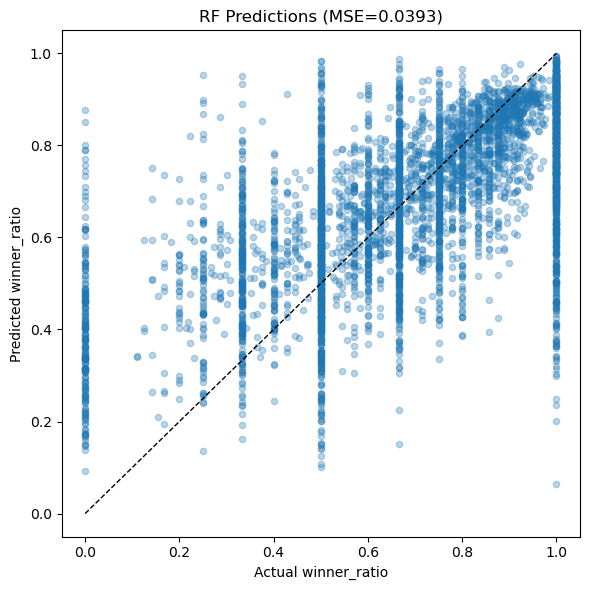

=== mean winner_ratio per bin (validation) ===
      bin   n  actual_mean  pred_mean
0.00–0.05 193       0.0000     0.4000
0.05–0.10   0          NaN        NaN
0.10–0.15  12       0.1331     0.4779
0.15–0.20  41       0.1884     0.4621
0.20–0.25  85       0.2453     0.4985
0.25–0.30  29       0.2859     0.5552
0.30–0.35 228       0.3331     0.5240
0.35–0.40 112       0.3923     0.5329
0.40–0.45  54       0.4329     0.5674
0.45–0.50 660       0.4984     0.5638
0.50–0.55  55       0.5372     0.6104
0.55–0.60 270       0.5864     0.6275
0.60–0.65 124       0.6287     0.6609
0.65–0.70 499       0.6700     0.6670
0.70–0.75 398       0.7390     0.6964
0.75–0.80 295       0.7877     0.7364
0.80–0.85 219       0.8304     0.7890
0.85–0.90 326       0.8753     0.8075
0.90–0.95 217       0.9233     0.8505
0.95–1.00 909       0.9982     0.7863


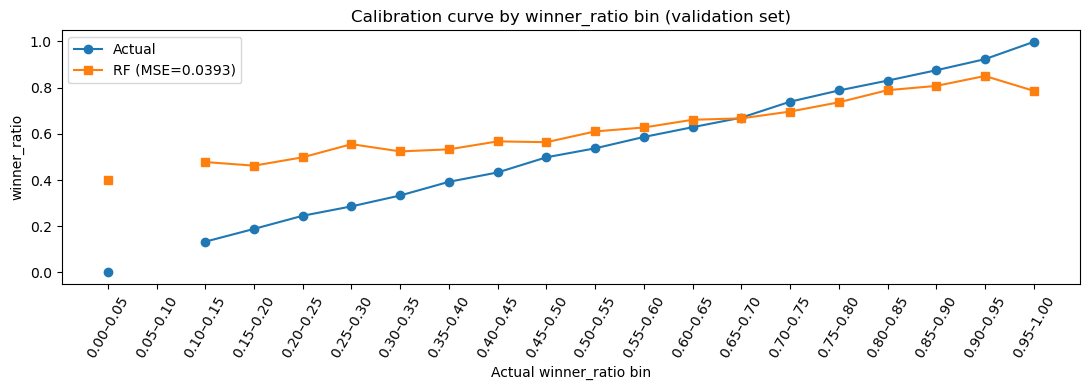

[  7.48s] Done


In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import perf_counter

from sklearn.model_selection    import train_test_split, GridSearchCV
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.compose            import ColumnTransformer
from sklearn.pipeline           import Pipeline
from sklearn.metrics            import mean_squared_error
from sklearn.ensemble           import RandomForestRegressor

# ───────────────────────────────────────────────────────────────────────────────
# 0 · Timer (optional)
# ───────────────────────────────────────────────────────────────────────────────
t0 = perf_counter()
def tick(msg):
    print(f"[{perf_counter()-t0:6.2f}s] {msg}")

# ───────────────────────────────────────────────────────────────────────────────
# 1 · Load & split
# ───────────────────────────────────────────────────────────────────────────────
tick("Loading & splitting data")
# assume `train` is your DataFrame already in memory
y = train.pop("winner_ratio").values
X = train.copy()

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ───────────────────────────────────────────────────────────────────────────────
# 2 · Preprocessor
# ───────────────────────────────────────────────────────────────────────────────
pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", StandardScaler(),                     num_cols)
], sparse_threshold=0.3)

# ───────────────────────────────────────────────────────────────────────────────
# 3 · RF pipeline + hyperparameter grid
# ───────────────────────────────────────────────────────────────────────────────
pipe_rf = Pipeline([
    ("pre", pre),
    ("rf", RandomForestRegressor(
        random_state=42,
        n_jobs=-1
    ))
])

param_grid = {
    # "rf__n_estimators":      [100, 200, 500],
    # "rf__max_depth":         [None, 10, 20],
    "rf__max_features":      ["sqrt", "log2"],
    # "rf__min_samples_split": [2, 5],
    # "rf__min_samples_leaf":  [1, 2],
}

tick("Starting GridSearchCV for RF")
search = GridSearchCV(
    pipe_rf,
    param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)
search.fit(X_tr, y_tr)
best = search.best_estimator_
tick("GridSearchCV done")

# ───────────────────────────────────────────────────────────────────────────────
# 4 · Validation performance
# ───────────────────────────────────────────────────────────────────────────────
y_pred_rf = best.predict(X_val)
mse_rf  = mean_squared_error(y_val, y_pred_rf)
print(f"\n▶ RFRegressor val MSE = {mse_rf:.5f}\n")

# scatter plot
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred_rf, alpha=0.3, s=20)
plt.plot([0,1],[0,1],"k--",lw=1)
plt.xlabel("Actual winner_ratio")
plt.ylabel("Predicted winner_ratio")
plt.title(f"RF Predictions (MSE={mse_rf:.4f})")
plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────────────────────────────────────
# 5 · Bin-level calibration (unchanged)
# ───────────────────────────────────────────────────────────────────────────────
edges  = np.linspace(0, 1, 21)  # 20 bins
labels = [f"{edges[i]:.2f}–{edges[i+1]:.2f}" for i in range(20)]

df = pd.DataFrame({
    "actual": y_val,
    "pred":   y_pred_rf
})
df["bin"] = pd.cut(df.actual, bins=edges, labels=labels, include_lowest=True)

summary = (
    df.groupby("bin", observed=False)
      .agg(
         n=("actual","size"),
         actual_mean=("actual","mean"),
         pred_mean=("pred","mean")
      )
      .reset_index()
)

print("=== mean winner_ratio per bin (validation) ===")
print(summary.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# calibration curve
plt.figure(figsize=(11,4))
plt.plot(summary.bin, summary.actual_mean, marker="o", label="Actual")
plt.plot(summary.bin, summary.pred_mean,    marker="s",
         label=f"RF (MSE={mse_rf:.4f})")
plt.xticks(rotation=60)
plt.ylabel("winner_ratio")
plt.xlabel("Actual winner_ratio bin")
plt.legend()
plt.title("Calibration curve by winner_ratio bin (validation set)")
plt.tight_layout()
plt.show()

tick("Done")


In [133]:
#Run RF on the test set:
y_pred_rf_test = best.predict(test)
submission_rf = pd.DataFrame({
    "index": test.index,
    "winner_ratio": y_pred_rf_test
})
submission_rf.to_csv("RFonLOGITwinning_allrows_in_test_no_calibration.csv", index=False)
submission_rf.shape

(115232, 2)

# hurdle Approach (Classifier + Regressor)

In [134]:
train = train_bkp.copy()
test= test_bkp.copy()

[  0.00s] Loading & splitting data
[  0.01s] Training vanilla XGB

▶ Vanilla XGB    val MSE = 0.03800
[  0.70s] Training weighted XGB
▶ Weighted XGB   val MSE = 0.05109
[  1.48s] Isotonic calibration of weighted preds
▶ Weighted+Iso   val MSE = 0.04051

⇒ Best model: vanilla (MSE=0.03800)



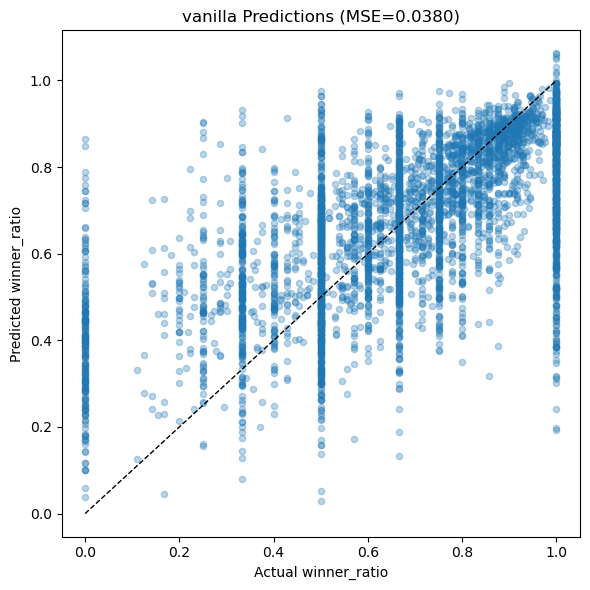

=== mean winner_ratio per bin (validation) ===
      bin   n  actual_mean  pred_mean
0.00–0.05 193       0.0000     0.3980
0.05–0.10   0          NaN        NaN
0.10–0.15  12       0.1331     0.4244
0.15–0.20  41       0.1884     0.4549
0.20–0.25  85       0.2453     0.4962
0.25–0.30  29       0.2859     0.5162
0.30–0.35 228       0.3331     0.5176
0.35–0.40 112       0.3923     0.5226
0.40–0.45  54       0.4329     0.5544
0.45–0.50 660       0.4984     0.5666
0.50–0.55  55       0.5372     0.6074
0.55–0.60 270       0.5864     0.6270
0.60–0.65 124       0.6287     0.6595
0.65–0.70 499       0.6700     0.6634
0.70–0.75 398       0.7390     0.6985
0.75–0.80 295       0.7877     0.7428
0.80–0.85 219       0.8304     0.7959
0.85–0.90 326       0.8753     0.8154
0.90–0.95 217       0.9233     0.8609
0.95–1.00 909       0.9982     0.7938


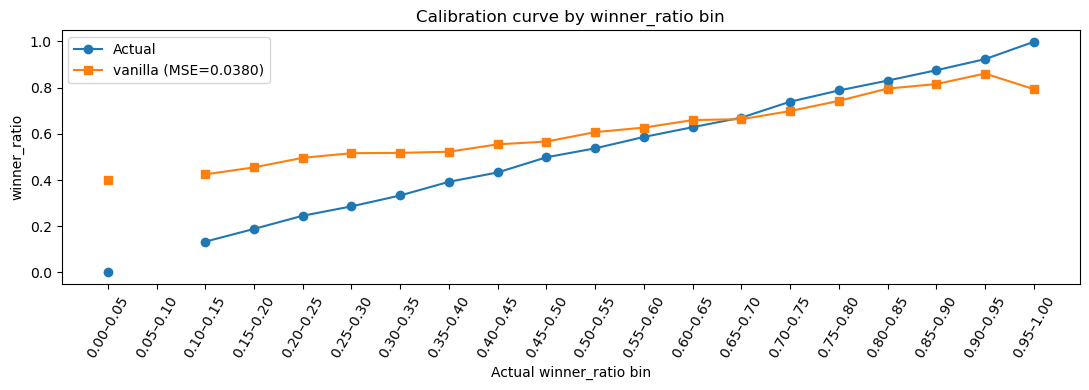

[  1.70s] Done


In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import perf_counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import OneHotEncoder, StandardScaler
from sklearn.compose         import ColumnTransformer
from sklearn.pipeline        import Pipeline
from sklearn.metrics         import mean_squared_error
from sklearn.isotonic        import IsotonicRegression

from xgboost import XGBRegressor

# ───────────────────────────────────────────────────────────────────────────────
# 0 · Timer
# ───────────────────────────────────────────────────────────────────────────────
t0 = perf_counter()
def tick(msg):
    print(f"[{perf_counter()-t0:6.2f}s] {msg}")

# ───────────────────────────────────────────────────────────────────────────────
# 1 · Load & split
# ───────────────────────────────────────────────────────────────────────────────
tick("Loading & splitting data")
# assume `train` is your DataFrame already in memory
y = train.pop("winner_ratio").values
X = train.copy()

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ───────────────────────────────────────────────────────────────────────────────
# 2 · Preprocessor
# ───────────────────────────────────────────────────────────────────────────────
pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", StandardScaler(),                     num_cols)
], sparse_threshold=0.3)

# ───────────────────────────────────────────────────────────────────────────────
# 3 · Vanilla XGB (for reference)
# ───────────────────────────────────────────────────────────────────────────────
tick("Training vanilla XGB")
pipe_vanilla = Pipeline([
    ("pre", pre),
    ("xgb", XGBRegressor(
        objective="reg:squarederror",
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        random_state=42,
        verbosity=0
    ))
])
pipe_vanilla.fit(X_tr, y_tr)
y_van = pipe_vanilla.predict(X_val)
mse_van = mean_squared_error(y_val, y_van)
print(f"\n▶ Vanilla XGB    val MSE = {mse_van:.5f}")

# ───────────────────────────────────────────────────────────────────────────────
# 4 · Weighted XGB to up‑weight extremes
# ───────────────────────────────────────────────────────────────────────────────
tick("Training weighted XGB")
# define weights: +10× for y<0.05 or y>0.95
w_tr = 1 + 10 * ((y_tr < 0.05) | (y_tr > 0.95)).astype(int)

pipe_wt = Pipeline([
    ("pre", pre),
    ("xgb", XGBRegressor(
        objective="reg:squarederror",
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        random_state=42,
        verbosity=0
    ))
])
# pass sample_weight through fit params with prefix 'xgb__'
pipe_wt.fit(X_tr, y_tr, xgb__sample_weight=w_tr)
y_wt = pipe_wt.predict(X_val)
mse_wt = mean_squared_error(y_val, y_wt)
print(f"▶ Weighted XGB   val MSE = {mse_wt:.5f}")

# ───────────────────────────────────────────────────────────────────────────────
# 5 · Isotonic Calibration on weighted model
# ───────────────────────────────────────────────────────────────────────────────
tick("Isotonic calibration of weighted preds")
iso = IsotonicRegression(out_of_bounds="clip")
iso.fit(y_wt, y_val)
y_iso = iso.predict(y_wt)
mse_iso = mean_squared_error(y_val, y_iso)
print(f"▶ Weighted+Iso   val MSE = {mse_iso:.5f}\n")

# choose best of the three
best_preds = {"vanilla": (y_van, mse_van),
              "weighted": (y_wt, mse_wt),
              "weighted_iso": (y_iso, mse_iso)}
best_name, (y_best, mse_best) = min(best_preds.items(), key=lambda kv: kv[1][1])
print(f"⇒ Best model: {best_name} (MSE={mse_best:.5f})\n")

# ───────────────────────────────────────────────────────────────────────────────
# 6 · Scatter of best preds
# ───────────────────────────────────────────────────────────────────────────────
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_best, alpha=0.3, s=20)
plt.plot([0,1],[0,1],"k--", lw=1)
plt.xlabel("Actual winner_ratio")
plt.ylabel("Predicted winner_ratio")
plt.title(f"{best_name} Predictions (MSE={mse_best:.4f})")
plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────────────────────────────────────
# 7 · Bin‑level Calibration Table & Curve
# ───────────────────────────────────────────────────────────────────────────────
edges  = np.linspace(0, 1, 21)
labels = [f"{edges[i]:.2f}–{edges[i+1]:.2f}" for i in range(20)]

df_bin = pd.DataFrame({
    "actual": y_val,
    "pred":   y_best
})
df_bin["bin"] = pd.cut(df_bin.actual, bins=edges,
                       labels=labels, include_lowest=True)

summary = (
    df_bin.groupby("bin", observed=False)
          .agg(
              n=("actual",    "size"),
              actual_mean=("actual","mean"),
              pred_mean=("pred",    "mean")
          )
          .reset_index()
)
print("=== mean winner_ratio per bin (validation) ===")
print(summary.to_string(index=False,
      float_format=lambda x: f"{x:.4f}"))

plt.figure(figsize=(11,4))
plt.plot(summary.bin, summary.actual_mean, marker='o', label="Actual")
plt.plot(summary.bin, summary.pred_mean,  marker='s',
         label=f"{best_name} (MSE={mse_best:.4f})")
plt.xticks(rotation=60)
plt.ylabel("winner_ratio")
plt.xlabel("Actual winner_ratio bin")
plt.legend()
plt.title("Calibration curve by winner_ratio bin")
plt.tight_layout()
plt.show()

tick("Done")


In [137]:
#if vannilla is the best model:
y_test_pred = pipe_vanilla.predict(test)
submission_vanilla = pd.DataFrame({
    "index": test.index,
    "winner_ratio": y_test_pred
})
submission_vanilla.to_csv("VANILLA_XGBonLOGITwinning_allrows_in_test_no_calibration.csv", index=False)

In [143]:
train = train_bkp.copy()
test = test_bkp.copy()

[  0.00s] Loading & splitting data
[  0.01s] Building stacking ensemble
[  0.01s] Fitting stacking pipeline


/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21882071807306147, tolerance: 0.10551791574218251
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5719777544512681, tolerance: 0.10493174403763922
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.32285040065153225, tolerance: 0.10491536695550069
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/ds-nlp/lib/python3.12/si


▶ StackingRegressor val MSE = 0.03797
[ 89.97s] Calibrating with isotonic
▶ Stacked+Isotonic val MSE = 0.03738

⇒ Best model: stack_iso (MSE=0.03738)


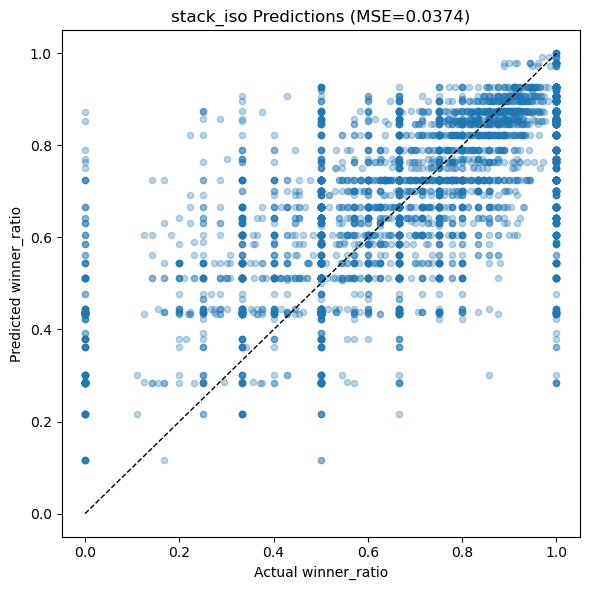

=== mean winner_ratio per bin (validation) ===
      bin   n  actual_mean  pred_mean
0.00–0.05 193       0.0000     0.4110
0.05–0.10   0          NaN        NaN
0.10–0.15  12       0.1331     0.4439
0.15–0.20  41       0.1884     0.4657
0.20–0.25  85       0.2453     0.5050
0.25–0.30  29       0.2859     0.5252
0.30–0.35 228       0.3331     0.5239
0.35–0.40 112       0.3923     0.5327
0.40–0.45  54       0.4329     0.5627
0.45–0.50 660       0.4984     0.5727
0.50–0.55  55       0.5372     0.6068
0.55–0.60 270       0.5864     0.6311
0.60–0.65 124       0.6287     0.6615
0.65–0.70 499       0.6700     0.6662
0.70–0.75 398       0.7390     0.6999
0.75–0.80 295       0.7877     0.7424
0.80–0.85 219       0.8304     0.7964
0.85–0.90 326       0.8753     0.8147
0.90–0.95 217       0.9233     0.8599
0.95–1.00 909       0.9982     0.7927


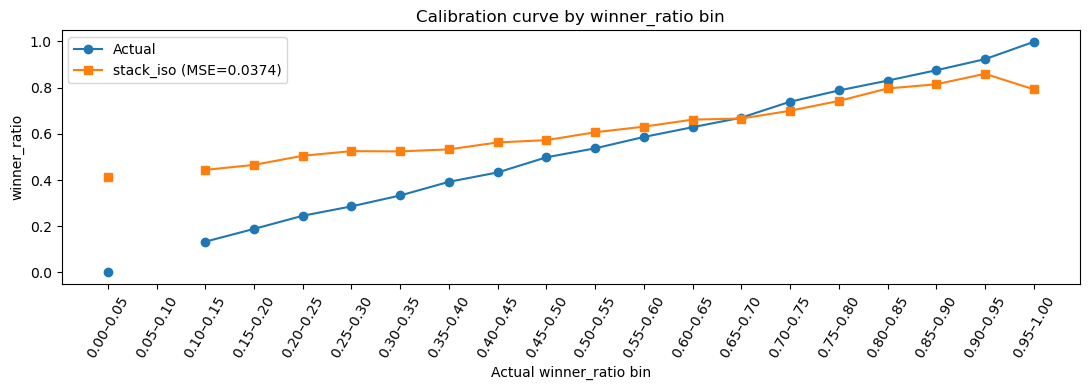

[ 90.23s] Done


In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import perf_counter

from sklearn.model_selection    import train_test_split
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.metrics           import mean_squared_error
from sklearn.ensemble          import RandomForestRegressor, StackingRegressor
from sklearn.linear_model      import ElasticNetCV, RidgeCV
from sklearn.isotonic          import IsotonicRegression

from xgboost import XGBRegressor

# ───────────────────────────────────────────────────────────────────────────────
# 0 · Timer
# ───────────────────────────────────────────────────────────────────────────────
t0 = perf_counter()
def tick(msg):
    print(f"[{perf_counter()-t0:6.2f}s] {msg}")

# ───────────────────────────────────────────────────────────────────────────────
# 1 · Load & split
# ───────────────────────────────────────────────────────────────────────────────
tick("Loading & splitting data")
# assume `train` is your DataFrame already in memory
y = train.pop("winner_ratio").values
X = train.copy()

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ───────────────────────────────────────────────────────────────────────────────
# 2 · Preprocessor
# ───────────────────────────────────────────────────────────────────────────────
pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", StandardScaler(),                     num_cols)
], sparse_threshold=0.3)

# ───────────────────────────────────────────────────────────────────────────────
# 3 · Build StackingRegressor
# ───────────────────────────────────────────────────────────────────────────────
tick("Building stacking ensemble")
base_estimators = [
    ("xgb", XGBRegressor(
        objective="reg:squarederror",
        n_estimators=500, learning_rate=0.05, max_depth=5,
        random_state=42, verbosity=0
    )),
    ("rf", RandomForestRegressor(
        n_estimators=500, max_depth=8, random_state=42
    )),
    ("enet", ElasticNetCV(
        l1_ratio=[0.1,0.5,1], alphas=np.logspace(-4,1,30),
        cv=5, n_jobs=-1, random_state=42
    ))
]

stack = StackingRegressor(
    estimators    = base_estimators,
    final_estimator = RidgeCV(),
    cv             = 5,
    n_jobs         = -1,
    passthrough    = False  # set True if you want the meta-model to also see original features
)

pipe_stack = Pipeline([
    ("pre", pre),
    ("stack", stack)
])

# ───────────────────────────────────────────────────────────────────────────────
# 4 · Fit & predict
# ───────────────────────────────────────────────────────────────────────────────
tick("Fitting stacking pipeline")
pipe_stack.fit(X_tr, y_tr)
y_stack = pipe_stack.predict(X_val)
mse_stack = mean_squared_error(y_val, y_stack)
print(f"\n▶ StackingRegressor val MSE = {mse_stack:.5f}")

# ───────────────────────────────────────────────────────────────────────────────
# 5 · (Optional) Isotonic calibration on stack
# ───────────────────────────────────────────────────────────────────────────────
tick("Calibrating with isotonic")
iso = IsotonicRegression(out_of_bounds="clip")
iso.fit(y_stack, y_val)
y_stack_iso = iso.predict(y_stack)
mse_stack_iso = mean_squared_error(y_val, y_stack_iso)
print(f"▶ Stacked+Isotonic val MSE = {mse_stack_iso:.5f}\n")

# choose best
best_name, y_best, mse_best = min(
    [("stack", y_stack, mse_stack),
     ("stack_iso", y_stack_iso, mse_stack_iso)],
    key=lambda x: x[2]
)
print(f"⇒ Best model: {best_name} (MSE={mse_best:.5f})")

# ───────────────────────────────────────────────────────────────────────────────
# 6 · Scatter plot of best preds
# ───────────────────────────────────────────────────────────────────────────────
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_best, alpha=0.3, s=20)
plt.plot([0,1],[0,1],"k--", lw=1)
plt.xlabel("Actual winner_ratio")
plt.ylabel("Predicted winner_ratio")
plt.title(f"{best_name} Predictions (MSE={mse_best:.4f})")
plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────────────────────────────────────
# 7 · Bin‑level Calibration Table & Curve
# ───────────────────────────────────────────────────────────────────────────────
edges  = np.linspace(0, 1, 21)
labels = [f"{edges[i]:.2f}–{edges[i+1]:.2f}" for i in range(20)]

df_bin = pd.DataFrame({
    "actual": y_val,
    "pred":   y_best
})
df_bin["bin"] = pd.cut(df_bin.actual, bins=edges,
                       labels=labels, include_lowest=True)

summary = (
    df_bin
    .groupby("bin", observed=False)
    .agg(
        n=("actual",    "size"),
        actual_mean=("actual","mean"),
        pred_mean=("pred",    "mean")
    )
    .reset_index()
)

print("=== mean winner_ratio per bin (validation) ===")
print(summary.to_string(index=False,
      float_format=lambda x: f"{x:.4f}"))

plt.figure(figsize=(11,4))
plt.plot(summary.bin, summary.actual_mean, marker='o', label="Actual")
plt.plot(summary.bin, summary.pred_mean,  marker='s',
         label=f"{best_name} (MSE={mse_best:.4f})")
plt.xticks(rotation=60)
plt.ylabel("winner_ratio")
plt.xlabel("Actual winner_ratio bin")
plt.legend()
plt.title("Calibration curve by winner_ratio bin")
plt.tight_layout()
plt.show()

tick("Done")


In [141]:
test=test_bkp.copy()

In [144]:
#if stacking is the best model:
y_test_pred = pipe_stack.predict(test)
submission_stack = pd.DataFrame({
    "index": test.index,
    "winner_ratio": y_test_pred
})
submission_stack.to_csv("STACKING_XGB_RF_ENET_RidgeCVonLOGITwinning_allrows_in_test_no_calibration.csv", index=False)

ValueError: Input X contains NaN.
ElasticNetCV does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [145]:
train = train_bkp.copy()

[  0.00s] Loading & splitting data
[  0.01s] Building & fitting stacking pipeline


/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21882071807306147, tolerance: 0.10551791574218251
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.32285040065153225, tolerance: 0.10491536695550069
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5719777544512681, tolerance: 0.10493174403763922
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/ds-nlp/lib/python3.12/si


▶ stack_iso  val MSE = 0.03738
[125.51s] Searching for best constants k0/kl/kh

Optimal constants → k0=0.000, kl=0.300, kh=0.980
Adjusted MSE = 0.02946

=== mean winner_ratio per bin (validation) ===
      bin   n  actual_mean  pred_mean
0.00–0.05 193       0.0000     0.0000
0.05–0.10   0          NaN        NaN
0.10–0.15  12       0.1331     0.4548
0.15–0.20  41       0.1884     0.4718
0.20–0.25  85       0.2453     0.5083
0.25–0.30  29       0.2859     0.5257
0.30–0.35 228       0.3331     0.5270
0.35–0.40 112       0.3923     0.5335
0.40–0.45  54       0.4329     0.5627
0.45–0.50 660       0.4984     0.5743
0.50–0.55  55       0.5372     0.6068
0.55–0.60 270       0.5864     0.6312
0.60–0.65 124       0.6287     0.6615
0.65–0.70 499       0.6700     0.6665
0.70–0.75 398       0.7390     0.6999
0.75–0.80 295       0.7877     0.7424
0.80–0.85 219       0.8304     0.7964
0.85–0.90 326       0.8753     0.8147
0.90–0.95 217       0.9233     0.8600
0.95–1.00 909       0.9982     0.7926


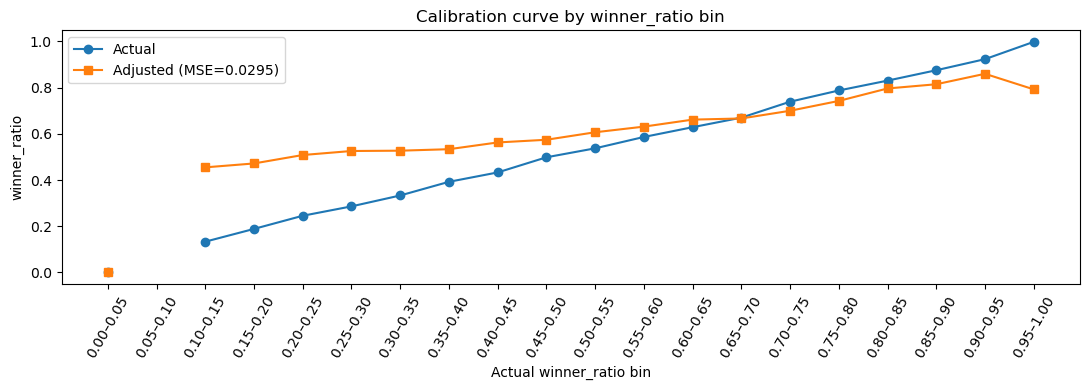

[125.88s] Done


In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import perf_counter

from sklearn.model_selection    import train_test_split
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.metrics           import mean_squared_error
from sklearn.ensemble          import RandomForestRegressor, StackingRegressor
from sklearn.linear_model      import ElasticNetCV, RidgeCV
from sklearn.isotonic          import IsotonicRegression

from xgboost import XGBRegressor

# ───────────────────────────────────────────────────────────────────────────────
# 0 · Timer
# ───────────────────────────────────────────────────────────────────────────────
t0 = perf_counter()
def tick(msg):
    print(f"[{perf_counter()-t0:6.2f}s] {msg}")

# ───────────────────────────────────────────────────────────────────────────────
# 1 · Load & split
# ───────────────────────────────────────────────────────────────────────────────
tick("Loading & splitting data")
# assume `train` is your DataFrame already in memory
y = train.pop("winner_ratio").values
X = train.copy()

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ───────────────────────────────────────────────────────────────────────────────
# 2 · Preprocessor
# ───────────────────────────────────────────────────────────────────────────────
pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", StandardScaler(),                     num_cols)
], sparse_threshold=0.3)

# ───────────────────────────────────────────────────────────────────────────────
# 3 · Build StackingRegressor + Isotonic
# ───────────────────────────────────────────────────────────────────────────────
tick("Building & fitting stacking pipeline")
base_estimators = [
    ("xgb", XGBRegressor(
        objective="reg:squarederror",
        n_estimators=500, learning_rate=0.05, max_depth=5,
        random_state=42, verbosity=0
    )),
    ("rf", RandomForestRegressor(
        n_estimators=500, max_depth=8, random_state=42
    )),
    ("enet", ElasticNetCV(
        l1_ratio=[0.1,0.5,1], alphas=np.logspace(-4,1,30),
        cv=5, n_jobs=-1, random_state=42
    ))
]
stack = StackingRegressor(
    estimators     = base_estimators,
    final_estimator= RidgeCV(),
    cv              = 5,
    n_jobs          = -1
)
pipe_stack = Pipeline([("pre", pre), ("stack", stack)])
pipe_stack.fit(X_tr, y_tr)

# raw stack predictions
y_stack     = pipe_stack.predict(X_val)
mse_stack   = mean_squared_error(y_val, y_stack)

# isotonic‑calibrated
iso         = IsotonicRegression(out_of_bounds="clip")
iso.fit(y_stack, y_val)
y_stack_iso = iso.predict(y_stack)
mse_iso     = mean_squared_error(y_val, y_stack_iso)

# choose best
if mse_iso < mse_stack:
    y_best, mse_best, best_name = y_stack_iso, mse_iso, "stack_iso"
else:
    y_best, mse_best, best_name = y_stack,     mse_stack, "stack"

print(f"\n▶ {best_name}  val MSE = {mse_best:.5f}")

# ───────────────────────────────────────────────────────────────────────────────
# 4 · Brute‑force piecewise constants (k0, kl, kh)
# ───────────────────────────────────────────────────────────────────────────────
tick("Searching for best constants k0/kl/kh")

# candidate ranges
k0_vals = np.linspace(0.00, 0.05, 6)   # for true zeros
kl_vals = np.linspace(0.00, 0.30, 31)  # for y_best < 0.30
kh_vals = np.linspace(0.95, 1.00, 6)   # for y_best > 0.95

best_mse = np.inf
best_k0 = best_kl = best_kh = None

for k0 in k0_vals:
    for kl in kl_vals:
        for kh in kh_vals:
            # apply piecewise adjustment
            y_adj = np.where(
                y_val == 0,               k0,
                np.where(
                    y_best <  0.30,       kl,
                    np.where(y_best > 0.95, kh, y_best)
                )
            )
            mse = mean_squared_error(y_val, y_adj)
            if mse < best_mse:
                best_mse, best_k0, best_kl, best_kh = mse, k0, kl, kh

print(f"\nOptimal constants → k0={best_k0:.3f}, kl={best_kl:.3f}, kh={best_kh:.3f}")
print(f"Adjusted MSE = {best_mse:.5f}")

# apply the best one
y_adj = np.where(
    y_val == 0,                     best_k0,
    np.where(
        y_best <  0.30,             best_kl,
        np.where(y_best > 0.95,     best_kh,
                 y_best)
    )
)

# ───────────────────────────────────────────────────────────────────────────────
# 5 · Bin‑level calibration table & plot
# ───────────────────────────────────────────────────────────────────────────────
edges  = np.linspace(0,1,21)
labels = [f"{edges[i]:.2f}–{edges[i+1]:.2f}" for i in range(20)]

df = pd.DataFrame({
    "actual": y_val,
    "pred":   y_adj
})
df["bin"] = pd.cut(df.actual, bins=edges, labels=labels, include_lowest=True)

summary = (
    df.groupby("bin", observed=False)
      .agg(
          n=("actual",    "size"),
          actual_mean=("actual","mean"),
          pred_mean=("pred",    "mean")
      )
      .reset_index()
)

print("\n=== mean winner_ratio per bin (validation) ===")
print(summary.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

plt.figure(figsize=(11,4))
plt.plot(summary.bin, summary.actual_mean, marker='o', label="Actual")
plt.plot(summary.bin, summary.pred_mean,  marker='s',
         label=f"Adjusted (MSE={best_mse:.4f})")
plt.xticks(rotation=60)
plt.ylabel("winner_ratio")
plt.xlabel("Actual winner_ratio bin")
plt.legend()
plt.title("Calibration curve by winner_ratio bin")
plt.tight_layout()
plt.show()

tick("Done")


In [ ]:
train = train_bkp.copy()

[  0.00s] 1 · Loading & splitting data
[  0.01s] …Done loading & splitting

[  0.01s] 2 · Building preprocessing pipeline
[  0.01s] …Done preprocessing setup

[  0.01s] 3 · RandomizedSearchCV (50 draws)
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END xgb__colsample_bytree=0.9162213204002109, xgb__learning_rate=0.022021571957149343, xgb__max_depth=6, xgb__n_estimators=476, xgb__reg_alpha=0.6174815096277165, xgb__reg_lambda=0.6116531604882809, xgb__subsample=0.5035331526098588; total time=   1.7s
[CV] END xgb__colsample_bytree=0.9162213204002109, xgb__learning_rate=0.022021571957149343, xgb__max_depth=6, xgb__n_estimators=476, xgb__reg_alpha=0.6174815096277165, xgb__reg_lambda=0.6116531604882809, xgb__subsample=0.5035331526098588; total time=   1.7s
[CV] END xgb__colsample_bytree=0.9162213204002109, xgb__learning_rate=0.022021571957149343, xgb__max_depth=6, xgb__n_estimators=476, xgb__reg_alpha=0.6174815096277165, xgb__reg_lambda=0.6116531604882809, xgb__subsample=

/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:48:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1742444258230/work/src/learner.cc:740: 
Parameters: { "xgb__colsample_bytree", "xgb__learning_rate", "xgb__max_depth", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:48:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1742444258230/work/src/learner.cc:740: 
Parameters: { "xgb__colsample_bytree", "xgb__learning_rate", "xgb__max_depth", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:48:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1742444258230/work/src/learn


Optimal importance threshold = 0.00000
MSE at this threshold = 0.04152

[ 91.77s] …Done threshold search

[ 91.77s] 6 · Retraining on selected features
▶ MSE (selected features) = 0.04152

[ 91.97s] …Done retraining

[ 91.97s] 7 · Searching piecewise constants


/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:48:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1742444258230/work/src/learner.cc:740: 
Parameters: { "xgb__colsample_bytree", "xgb__learning_rate", "xgb__max_depth", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

  warnings.warn(smsg, UserWarning)



Optimal constants → k0=0.000, k1=0.150, k2=0.300, kh=0.950
Final adjusted MSE = 0.03202

[ 93.03s] …Done piecewise search

[ 93.03s] 8 · Calibration table & plot
=== mean winner_ratio per bin (validation) ===
      bin   n  actual_mean  pred_mean
0.00–0.05 221       0.0000     0.0000
0.05–0.10   0          NaN        NaN
0.10–0.15   6       0.1376     0.3964
0.15–0.20  39       0.1898     0.4451
0.20–0.25  92       0.2475     0.4899
0.25–0.30  32       0.2855     0.5121
0.30–0.35 239       0.3333     0.5231
0.35–0.40 123       0.3943     0.5481
0.40–0.45  66       0.4340     0.5506
0.45–0.50 639       0.4984     0.5787
0.50–0.55  55       0.5357     0.6070
0.55–0.60 255       0.5853     0.6353
0.60–0.65  98       0.6271     0.6579
0.65–0.70 498       0.6705     0.6634
0.70–0.75 415       0.7380     0.7097
0.75–0.80 282       0.7875     0.7385
0.80–0.85 233       0.8299     0.7711
0.85–0.90 334       0.8744     0.8163
0.90–0.95 184       0.9221     0.8497
0.95–1.00 923       0.9981    

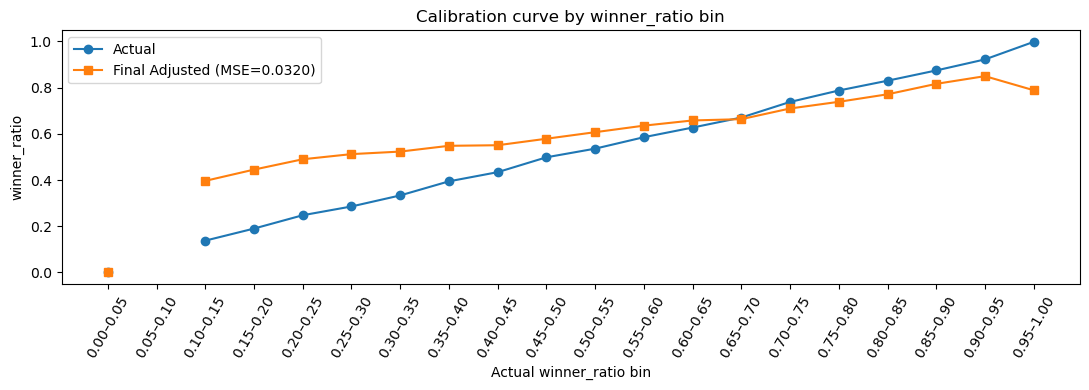

[ 93.14s] Done


In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import perf_counter

from sklearn.model_selection    import train_test_split, RandomizedSearchCV
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.metrics           import mean_squared_error
from sklearn.feature_selection import SelectFromModel

from xgboost import XGBRegressor
from scipy.stats import uniform, randint

# 0 · Timer & tick()
t0 = perf_counter()
def tick(msg):
    print(f"[{perf_counter()-t0:6.2f}s] {msg}")

# 1 · Load & split
tick("1 · Loading & splitting data")
y      = train.pop("winner_ratio").values
X      = train.copy()
cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)
tick("…Done loading & splitting\n")

# 2 · Preprocessor
tick("2 · Building preprocessing pipeline")
pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ("num", StandardScaler(),                                     num_cols)
], sparse_threshold=0.3)
tick("…Done preprocessing setup\n")

# 3 · Randomized hyperparameter search
tick("3 · RandomizedSearchCV (50 draws)")
pipe = Pipeline([
    ("pre", pre),
    ("xgb", XGBRegressor(objective="reg:squarederror", random_state=42))
])

param_dist = {
    "xgb__n_estimators":     randint(200, 2000),
    "xgb__learning_rate":    uniform(0.001, 0.099),
    "xgb__max_depth":        randint(3, 10),
    "xgb__subsample":        uniform(0.5, 0.5),
    "xgb__colsample_bytree": uniform(0.5, 0.5),
    "xgb__reg_alpha":        uniform(0, 1),
    "xgb__reg_lambda":       uniform(0, 1),
}

search = RandomizedSearchCV(
    estimator   = pipe,
    param_distributions = param_dist,
    n_iter      = 50,
    scoring     = "neg_mean_squared_error",
    cv          = 3,
    verbose     = 2,
    random_state=42,
    n_jobs      = -1
)
search.fit(X_tr, y_tr)
best_pipe = search.best_estimator_
tick("…Done RandomizedSearchCV\n")
print("▶ Best hyperparameters:", search.best_params_, "\n")

# 4 · Baseline validation
tick("4 · Validating tuned model")
y_base   = best_pipe.predict(X_val)
mse_base = mean_squared_error(y_val, y_base)
print(f"▶ Baseline MSE = {mse_base:.5f}\n")
tick("…Done validation\n")

# 5 · Importance‐threshold search
tick("5 · Extracting importances & threshold search")
xgb_model   = best_pipe.named_steps["xgb"]
importances = xgb_model.feature_importances_
fitted_pre  = best_pipe.named_steps["pre"]
ohe         = fitted_pre.named_transformers_["cat"]
cat_names   = ohe.get_feature_names_out(cat_cols)
all_feats   = np.concatenate([cat_names, num_cols])

fi = pd.DataFrame({
    "feature":    all_feats,
    "importance": importances
}).sort_values("importance", ascending=False).reset_index(drop=True)

X_tr_t   = fitted_pre.transform(X_tr)
thr_vals = np.linspace(0, importances.max(), 20)

best_thr_mse = np.inf
best_thr     = None
for thr in thr_vals:
    sel = SelectFromModel(xgb_model, threshold=thr, prefit=True)
    if sel.transform(X_tr_t).shape[1] == 0:
        continue
    pipe_sel = Pipeline([
        ("pre", pre),
        ("sel", sel),
        ("xgb", XGBRegressor(**search.best_params_,
                             objective="reg:squarederror",
                             random_state=42))
    ])
    pipe_sel.fit(X_tr, y_tr)
    y_sel = pipe_sel.predict(X_val)
    mse_t = mean_squared_error(y_val, y_sel)
    if mse_t < best_thr_mse:
        best_thr_mse, best_thr = mse_t, thr

print(f"\nOptimal importance threshold = {best_thr:.5f}")
print(f"MSE at this threshold = {best_thr_mse:.5f}\n")
tick("…Done threshold search\n")

# 6 · Retrain on selected features
tick("6 · Retraining on selected features")
selector = SelectFromModel(xgb_model, threshold=best_thr, prefit=True)
pipe_sel = Pipeline([
    ("pre", pre),
    ("sel", selector),
    ("xgb", XGBRegressor(**search.best_params_,
                         objective="reg:squarederror",
                         random_state=42))
])
pipe_sel.fit(X_tr, y_tr)
y_sel   = pipe_sel.predict(X_val)
mse_sel = mean_squared_error(y_val, y_sel)
print(f"▶ MSE (selected features) = {mse_sel:.5f}\n")
tick("…Done retraining\n")

# 7 · Piecewise constant adjustment (4 bins)
tick("7 · Searching piecewise constants")
k0_vals = np.linspace(0.00, 0.05, 6)
k1_vals = np.linspace(0.00, 0.15, 16)
k2_vals = np.linspace(0.15, 0.30, 16)
kh_vals = np.linspace(0.95, 1.00, 6)

best_adj_mse = np.inf
best_k0 = best_k1 = best_k2 = best_kh = None

for k0 in k0_vals:
    for k1 in k1_vals:
        for k2 in k2_vals:
            for kh in kh_vals:
                y_adj = np.where(
                    y_val == 0, k0,
                    np.where(
                        y_sel < 0.15,   k1,
                        np.where(
                            y_sel < 0.30, k2,
                            np.where(y_sel > 0.95, kh, y_sel)
                        )
                    )
                )
                mse_adj = mean_squared_error(y_val, y_adj)
                if mse_adj < best_adj_mse:
                    best_adj_mse, best_k0, best_k1, best_k2, best_kh = (
                        mse_adj, k0, k1, k2, kh)

print(
    f"\nOptimal constants → k0={best_k0:.3f}, "
    f"k1={best_k1:.3f}, k2={best_k2:.3f}, kh={best_kh:.3f}"
)
print(f"Final adjusted MSE = {best_adj_mse:.5f}\n")
tick("…Done piecewise search\n")

y_final = np.where(
    y_val == 0, best_k0,
    np.where(
        y_sel < 0.15,   best_k1,
        np.where(
            y_sel < 0.30, best_k2,
            np.where(y_sel > 0.95, best_kh, y_sel)
        )
    )
)

# 8 · Calibration table & plot
tick("8 · Calibration table & plot")
edges  = np.linspace(0, 1, 21)
labels = [f"{edges[i]:.2f}–{edges[i+1]:.2f}" for i in range(20)]

df = pd.DataFrame({"actual": y_val, "pred": y_final})
df["bin"] = pd.cut(df.actual, bins=edges, labels=labels, include_lowest=True)

summary = (
    df.groupby("bin", observed=False)
      .agg(
          n=("actual",    "size"),
          actual_mean=("actual","mean"),
          pred_mean=("pred","mean")
      )
      .reset_index()
)

print("=== mean winner_ratio per bin (validation) ===")
print(summary.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

plt.figure(figsize=(11,4))
plt.plot(summary.bin, summary.actual_mean, marker="o", label="Actual")
plt.plot(summary.bin, summary.pred_mean,  marker="s",
         label=f"Final Adjusted (MSE={best_adj_mse:.4f})")
plt.xticks(rotation=60)
plt.ylabel("winner_ratio")
plt.xlabel("Actual winner_ratio bin")
plt.legend()
plt.title("Calibration curve by winner_ratio bin")
plt.tight_layout()
plt.show()
tick("Done")


In [202]:
train = train_bkp.copy()

[  0.00s] 1 · Loading & splitting data
[  0.01s] …Done loading & splitting

[  0.01s] 2 · Building preprocessing pipeline
[  0.01s] …Done preprocessing setup

[  0.01s] 3 · RandomizedSearchCV (50 draws)
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END xgb__colsample_bytree=0.9162213204002109, xgb__learning_rate=0.022021571957149343, xgb__max_depth=6, xgb__n_estimators=476, xgb__reg_alpha=0.6174815096277165, xgb__reg_lambda=0.6116531604882809, xgb__subsample=0.5035331526098588; total time=   1.6s
[CV] END xgb__colsample_bytree=0.9162213204002109, xgb__learning_rate=0.022021571957149343, xgb__max_depth=6, xgb__n_estimators=476, xgb__reg_alpha=0.6174815096277165, xgb__reg_lambda=0.6116531604882809, xgb__subsample=0.5035331526098588; total time=   1.7s
[CV] END xgb__colsample_bytree=0.9162213204002109, xgb__learning_rate=0.022021571957149343, xgb__max_depth=6, xgb__n_estimators=476, xgb__reg_alpha=0.6174815096277165, xgb__reg_lambda=0.6116531604882809, xgb__subsample=

/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:53:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1742444258230/work/src/learner.cc:740: 
Parameters: { "xgb__colsample_bytree", "xgb__learning_rate", "xgb__max_depth", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:53:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1742444258230/work/src/learner.cc:740: 
Parameters: { "xgb__colsample_bytree", "xgb__learning_rate", "xgb__max_depth", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:53:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1742444258230/work/src/learn


Optimal importance threshold = 0.00000
 MSE at threshold = 0.04152

[ 92.55s] …Done threshold search

[ 92.55s] 6 · Retraining with selected features
▶ MSE (selected features) = 0.04152

[ 92.74s] …Done retraining

[ 92.74s] 7 · Piecewise scaling per segment
▶ Post‐scale adjusted MSE = 0.03291

[ 92.74s] …Done piecewise scaling

[ 92.74s] 8 · Calibration table & plot
=== mean winner_ratio per bin (validation) ===
      bin   n  actual_mean  pred_mean
0.00–0.05 221       0.0000     0.0602
0.05–0.10   0          NaN        NaN
0.10–0.15   6       0.1376     0.3482
0.15–0.20  39       0.1898     0.4420
0.20–0.25  92       0.2475     0.4873
0.25–0.30  32       0.2855     0.5108
0.30–0.35 239       0.3333     0.5215
0.35–0.40 123       0.3943     0.5474
0.40–0.45  66       0.4340     0.5502
0.45–0.50 639       0.4984     0.5774
0.50–0.55  55       0.5357     0.6070
0.55–0.60 255       0.5853     0.6353
0.60–0.65  98       0.6271     0.6579
0.65–0.70 498       0.6705     0.6629
0.70–0.75 41

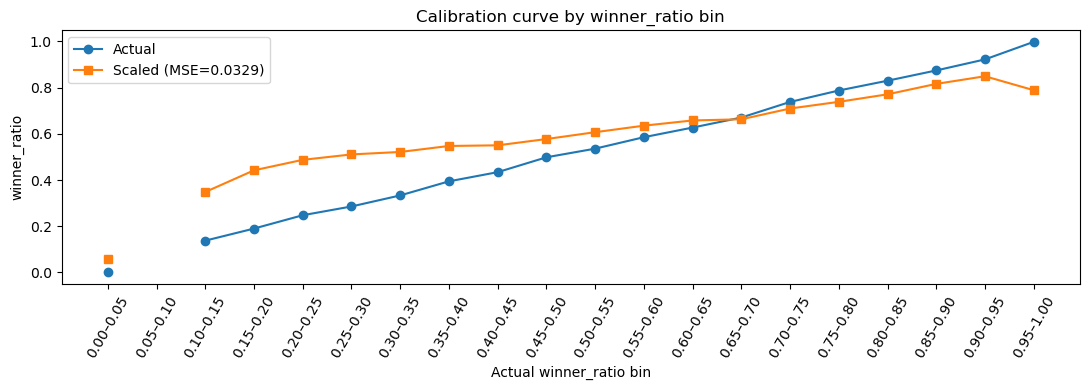

[ 92.82s] Done


In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import perf_counter

from sklearn.model_selection    import train_test_split, RandomizedSearchCV
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.metrics           import mean_squared_error
from sklearn.feature_selection import SelectFromModel

from xgboost import XGBRegressor
from scipy.stats import uniform, randint

# ───────────────────────────────────────────────────────────────────────────────
# 0 · Timer
# ───────────────────────────────────────────────────────────────────────────────
t0 = perf_counter()
def tick(msg):
    print(f"[{perf_counter()-t0:6.2f}s] {msg}")

# ───────────────────────────────────────────────────────────────────────────────
# 1 · Load & split
# ───────────────────────────────────────────────────────────────────────────────
tick("1 · Loading & splitting data")
y      = train.pop("winner_ratio").values
X      = train.copy()
cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)
tick("…Done loading & splitting\n")

# ───────────────────────────────────────────────────────────────────────────────
# 2 · Preprocessor
# ───────────────────────────────────────────────────────────────────────────────
tick("2 · Building preprocessing pipeline")
pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ("num", StandardScaler(),                                     num_cols)
], sparse_threshold=0.3)
tick("…Done preprocessing setup\n")

# ───────────────────────────────────────────────────────────────────────────────
# 3 · Randomized hyperparameter search
# ───────────────────────────────────────────────────────────────────────────────
tick("3 · RandomizedSearchCV (50 draws)")
pipe = Pipeline([
    ("pre", pre),
    ("xgb", XGBRegressor(objective="reg:squarederror", random_state=42))
])
param_dist = {
    "xgb__n_estimators":     randint(200, 2000),
    "xgb__learning_rate":    uniform(0.001, 0.099),
    "xgb__max_depth":        randint(3, 10),
    "xgb__subsample":        uniform(0.5, 0.5),
    "xgb__colsample_bytree": uniform(0.5, 0.5),
    "xgb__reg_alpha":        uniform(0, 1),
    "xgb__reg_lambda":       uniform(0, 1),
}
search = RandomizedSearchCV(
    pipe, param_dist,
    n_iter=50,
    scoring="neg_mean_squared_error",
    cv=3, verbose=2,
    random_state=42,
    n_jobs=-1
)
search.fit(X_tr, y_tr)
best_pipe = search.best_estimator_
tick("…Done hyperparam search\n")
print("▶ Best params:", search.best_params_, "\n")

# ───────────────────────────────────────────────────────────────────────────────
# 4 · Baseline validation
# ───────────────────────────────────────────────────────────────────────────────
tick("4 · Validating tuned model")
y_base   = best_pipe.predict(X_val)
mse_base = mean_squared_error(y_val, y_base)
print(f"▶ Baseline MSE = {mse_base:.5f}\n")
tick("…Done validation\n")

# ───────────────────────────────────────────────────────────────────────────────
# 5 · Feature‐importance threshold search
# ───────────────────────────────────────────────────────────────────────────────
tick("5 · Feature‐importance threshold search")
xgb_model   = best_pipe.named_steps["xgb"]
importances = xgb_model.feature_importances_
fitted_pre  = best_pipe.named_steps["pre"]

# get feature names
ohe        = fitted_pre.named_transformers_["cat"]
cat_names  = ohe.get_feature_names_out(cat_cols)
all_feats  = np.concatenate([cat_names, num_cols])

# pre‐transform training once
X_tr_t = fitted_pre.transform(X_tr)

thr_vals = np.linspace(0, importances.max(), 20)
best_thr_mse = np.inf
best_thr     = None

for thr in thr_vals:
    sel = SelectFromModel(xgb_model, threshold=thr, prefit=True)
    if sel.transform(X_tr_t).shape[1] == 0:
        continue
    pipe_sel = Pipeline([
        ("pre", pre),
        ("sel", sel),
        ("xgb", XGBRegressor(**search.best_params_,
                             objective="reg:squarederror",
                             random_state=42))
    ])
    pipe_sel.fit(X_tr, y_tr)
    y_sel = pipe_sel.predict(X_val)
    mse_t = mean_squared_error(y_val, y_sel)
    if mse_t < best_thr_mse:
        best_thr_mse, best_thr = mse_t, thr

print(f"\nOptimal importance threshold = {best_thr:.5f}")
print(f" MSE at threshold = {best_thr_mse:.5f}\n")
tick("…Done threshold search\n")

# ───────────────────────────────────────────────────────────────────────────────
# 6 · Retrain on selected features
# ───────────────────────────────────────────────────────────────────────────────
tick("6 · Retraining with selected features")
selector = SelectFromModel(xgb_model, threshold=best_thr, prefit=True)
pipe_sel = Pipeline([
    ("pre", pre),
    ("sel", selector),
    ("xgb", XGBRegressor(**search.best_params_,
                         objective="reg:squarederror",
                         random_state=42))
])
pipe_sel.fit(X_tr, y_tr)
y_sel   = pipe_sel.predict(X_val)
mse_sel = mean_squared_error(y_val, y_sel)
print(f"▶ MSE (selected features) = {mse_sel:.5f}\n")
tick("…Done retraining\n")

# ───────────────────────────────────────────────────────────────────────────────
# 7 · Piecewise multiplicative adjustment
# ───────────────────────────────────────────────────────────────────────────────
tick("7 · Piecewise scaling per segment")

# define masks
mask0      = (y_val == 0)
mask1      = (y_sel > 0)    & (y_sel < 0.15)
mask2      = (y_sel >= 0.15)& (y_sel < 0.30)
mask_high  = (y_sel > 0.95)

# allocate final array
y_adj = y_sel.copy()

#  0) zero‐group: force to 0
y_adj[mask0] = 0.0

#  1) low‐group #1: find s1 that minimizes ∑(s1·ŷ − y)²
if mask1.any():
    s1 = (y_sel[mask1] * y_val[mask1]).sum() / (y_sel[mask1]**2).sum()
    y_adj[mask1] = y_sel[mask1] * s1

#  2) low‐group #2
if mask2.any():
    s2 = (y_sel[mask2] * y_val[mask2]).sum() / (y_sel[mask2]**2).sum()
    y_adj[mask2] = y_sel[mask2] * s2

#  3) high‐group
if mask_high.any():
    sh = (y_sel[mask_high] * y_val[mask_high]).sum() / (y_sel[mask_high]**2).sum()
    y_adj[mask_high] = y_sel[mask_high] * sh

mse_adj = mean_squared_error(y_val, y_adj)
print(f"▶ Post‐scale adjusted MSE = {mse_adj:.5f}\n")
tick("…Done piecewise scaling\n")

# ───────────────────────────────────────────────────────────────────────────────
# 8 · Calibration table & plot
# ───────────────────────────────────────────────────────────────────────────────
tick("8 · Calibration table & plot")
edges  = np.linspace(0, 1, 21)
labels = [f"{edges[i]:.2f}–{edges[i+1]:.2f}" for i in range(20)]

df = pd.DataFrame({"actual": y_val, "pred": y_adj})
df["bin"] = pd.cut(df.actual, bins=edges,
                   labels=labels, include_lowest=True)

summary = (
    df.groupby("bin", observed=False)
      .agg(
          n=("actual",    "size"),
          actual_mean=("actual","mean"),
          pred_mean=("pred",    "mean")
      )
      .reset_index()
)

print("=== mean winner_ratio per bin (validation) ===")
print(summary.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

plt.figure(figsize=(11,4))
plt.plot(summary.bin, summary.actual_mean, marker="o", label="Actual")
plt.plot(summary.bin, summary.pred_mean,  marker="s",
         label=f"Scaled (MSE={mse_adj:.4f})")
plt.xticks(rotation=60)
plt.ylabel("winner_ratio")
plt.xlabel("Actual winner_ratio bin")
plt.legend()
plt.title("Calibration curve by winner_ratio bin")
plt.tight_layout()
plt.show()
tick("Done")


In [ ]:
train = train_bkp.copy()

In [191]:
train = train_bkp.copy()

[  0.00s] 1 · Loading & splitting data
[  0.01s] …Done loading & splitting

[  0.01s] 2 · Building preprocessing pipeline
[  0.01s] …Done preprocessing setup

[  0.01s] 3 · Hyperparameter search
Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.4s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.4s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.4s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.4s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.5s
[CV] END xgb__colsample_bytree=0.8, xg

/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:39:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1742444258230/work/src/learner.cc:740: 
Parameters: { "xgb__colsample_bytree", "xgb__learning_rate", "xgb__max_depth", "xgb__n_estimators", "xgb__subsample" } are not used.

  warnings.warn(smsg, UserWarning)



Optimal constants → k0=0.000, k1=0.150, k2=0.300, kh=0.950
Final adjusted MSE = 0.03202

[ 42.93s] …Done piecewise search

[ 42.93s] 8 · Calibration table & plot
=== Mean per bin (validation) ===
      bin   n  actual_mean  pred_mean
0.00–0.05 221       0.0000     0.0000
0.05–0.10   0          NaN        NaN
0.10–0.15   6       0.1376     0.3964
0.15–0.20  39       0.1898     0.4451
0.20–0.25  92       0.2475     0.4899
0.25–0.30  32       0.2855     0.5121
0.30–0.35 239       0.3333     0.5231
0.35–0.40 123       0.3943     0.5481
0.40–0.45  66       0.4340     0.5506
0.45–0.50 639       0.4984     0.5787
0.50–0.55  55       0.5357     0.6070
0.55–0.60 255       0.5853     0.6353
0.60–0.65  98       0.6271     0.6579
0.65–0.70 498       0.6705     0.6634
0.70–0.75 415       0.7380     0.7097
0.75–0.80 282       0.7875     0.7385
0.80–0.85 233       0.8299     0.7711
0.85–0.90 334       0.8744     0.8163
0.90–0.95 184       0.9221     0.8497
0.95–1.00 923       0.9981     0.7887


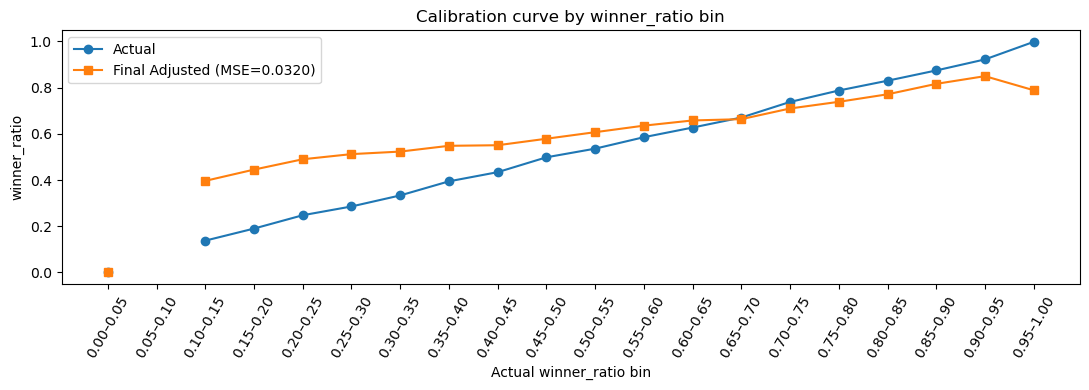

[ 43.03s] Done


In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import perf_counter

from sklearn.model_selection    import train_test_split, GridSearchCV
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.metrics           import mean_squared_error
from sklearn.feature_selection import SelectFromModel

from xgboost import XGBRegressor

# 0 · Timer & tick()
t0 = perf_counter()
def tick(msg):
    print(f"[{perf_counter()-t0:6.2f}s] {msg}")

# 1 · Load & split
tick("1 · Loading & splitting data")
y      = train.pop("winner_ratio").values
X      = train.copy()
cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)
tick("…Done loading & splitting\n")

# 2 · Preprocessor
tick("2 · Building preprocessing pipeline")
pre_pipeline = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", StandardScaler(),                     num_cols)
], sparse_threshold=0.3)
tick("…Done preprocessing setup\n")

# 3 · Hyperparameter search
tick("3 · Hyperparameter search")
pipe = Pipeline([
    ("pre", pre_pipeline),
    ("xgb", XGBRegressor(
        objective="reg:squarederror",
        verbosity=1,
        random_state=42
    ))
])
param_grid = {
    "xgb__n_estimators":     [200, 500, 1000],
    "xgb__learning_rate":    [0.01, 0.05],
    "xgb__max_depth":        [3, 5, 7],
    "xgb__subsample":        [0.8, 1.0],
    "xgb__colsample_bytree": [0.8, 1.0],
}
search = GridSearchCV(
    pipe, param_grid,
    scoring="neg_mean_squared_error",
    cv=3, verbose=2, n_jobs=-1
)
search.fit(X_tr, y_tr)
best_pipe = search.best_estimator_
tick("…Done GridSearchCV\n")
print("▶ Best params:", search.best_params_, "\n")

# 4 · Baseline validation
tick("4 · Validating on held‑out set")
y_base   = best_pipe.predict(X_val)
mse_base = mean_squared_error(y_val, y_base)
print(f"▶ MSE (all features) = {mse_base:.5f}\n")
tick("…Done validation\n")

# 5 · Importance threshold search
tick("5 · Extracting importances & searching thresholds")
xgb_model   = best_pipe.named_steps["xgb"]
importances = xgb_model.feature_importances_
fitted_pre  = best_pipe.named_steps["pre"]
ohe         = fitted_pre.named_transformers_["cat"]
cat_names   = ohe.get_feature_names_out(cat_cols)
all_feats   = np.concatenate([cat_names, num_cols])

fi = pd.DataFrame({
    "feature":    all_feats,
    "importance": importances
}).sort_values("importance", ascending=False).reset_index(drop=True)

X_tr_t   = fitted_pre.transform(X_tr)
thr_vals = np.linspace(0, importances.max(), 20)

best_thr_mse = np.inf
best_thr     = None

for thr in thr_vals:
    sel = SelectFromModel(xgb_model, threshold=thr, prefit=True)
    if sel.transform(X_tr_t).shape[1] == 0:
        continue
    pipe_sel = Pipeline([
        ("pre", pre_pipeline),
        ("sel", sel),
        ("xgb", XGBRegressor(
            **search.best_params_,
            objective="reg:squarederror",
            verbosity=0,
            random_state=42
        ))
    ])
    pipe_sel.fit(X_tr, y_tr)
    y_sel = pipe_sel.predict(X_val)
    mse_t = mean_squared_error(y_val, y_sel)
    if mse_t < best_thr_mse:
        best_thr_mse, best_thr = mse_t, thr

print(f"\nOptimal importance threshold = {best_thr:.5f}")
print(f"Validation MSE at that threshold = {best_thr_mse:.5f}\n")
tick("…Done threshold search\n")

# 6 · Final retrain on selected features
tick("6 · Final retrain with threshold")
selector = SelectFromModel(xgb_model, threshold=best_thr, prefit=True)
pipe_sel = Pipeline([
    ("pre", pre_pipeline),
    ("sel", selector),
    ("xgb", XGBRegressor(
        **search.best_params_,
        objective="reg:squarederror",
        verbosity=1,
        random_state=42
    ))
])
pipe_sel.fit(X_tr, y_tr)
y_sel   = pipe_sel.predict(X_val)
mse_sel = mean_squared_error(y_val, y_sel)
print(f"▶ MSE (selected features) = {mse_sel:.5f}\n")
tick("…Done retraining\n")

# 7 · Piecewise constant adjustment with two low‑ranges
tick("7 · Searching piecewise constants (k0, k1, k2, kh)")
k0_vals  = np.linspace(0.00, 0.05, 6)   # for y_val == 0
k1_vals  = np.linspace(0.00, 0.15, 16)  # for 0 < y_sel < 0.15
k2_vals  = np.linspace(0.15, 0.30, 16)  # for 0.15 <= y_sel < 0.30
kh_vals  = np.linspace(0.95, 1.00, 6)   # for y_sel > 0.95

best_adj_mse = np.inf
best_k0 = best_k1 = best_k2 = best_kh = None

for k0 in k0_vals:
    for k1 in k1_vals:
        for k2 in k2_vals:
            for kh in kh_vals:
                y_adj = np.where(
                    y_val == 0, k0,
                    np.where(
                        y_sel < 0.15,   k1,
                        np.where(
                            y_sel < 0.30, k2,
                            np.where(y_sel > 0.95, kh, y_sel)
                        )
                    )
                )
                mse_adj = mean_squared_error(y_val, y_adj)
                if mse_adj < best_adj_mse:
                    best_adj_mse = mse_adj
                    best_k0, best_k1, best_k2, best_kh = k0, k1, k2, kh

print(
    f"\nOptimal constants → "
    f"k0={best_k0:.3f}, k1={best_k1:.3f}, "
    f"k2={best_k2:.3f}, kh={best_kh:.3f}"
)
print(f"Final adjusted MSE = {best_adj_mse:.5f}\n")
tick("…Done piecewise search\n")

y_final = np.where(
    y_val == 0, best_k0,
    np.where(
        y_sel < 0.15,   best_k1,
        np.where(
            y_sel < 0.30, best_k2,
            np.where(y_sel > 0.95, best_kh, y_sel)
        )
    )
)

# 8 · Calibration table & plot
tick("8 · Calibration table & plot")
edges  = np.linspace(0, 1, 21)
labels = [f"{edges[i]:.2f}–{edges[i+1]:.2f}" for i in range(20)]

df = pd.DataFrame({"actual": y_val, "pred": y_final})
df["bin"] = pd.cut(df.actual, bins=edges, labels=labels, include_lowest=True)

summary = (
    df.groupby("bin", observed=False)
      .agg(
          n=("actual",    "size"),
          actual_mean=("actual","mean"),
          pred_mean=("pred",    "mean")
      )
      .reset_index()
)

print("=== Mean per bin (validation) ===")
print(summary.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

plt.figure(figsize=(11,4))
plt.plot(summary.bin, summary.actual_mean, marker="o", label="Actual")
plt.plot(summary.bin, summary.pred_mean,  marker="s",
         label=f"Final Adjusted (MSE={best_adj_mse:.4f})")
plt.xticks(rotation=60)
plt.ylabel("winner_ratio")
plt.xlabel("Actual winner_ratio bin")
plt.legend()
plt.title("Calibration curve by winner_ratio bin")
plt.tight_layout()
plt.show()
tick("Done")



▶ Raw-target    val MSE = 0.04244
▶ Transformed‑target val MSE = 0.08388

=== mean winner_ratio per bin (validation) ===
      bin   n  actual_mean  raw_mean  ttr_mean
0.00–0.05 221       0.0000    0.4398    0.2895
0.05–0.10   0          NaN       NaN       NaN
0.10–0.15   6       0.1376    0.4075    0.1747
0.15–0.20  39       0.1898    0.4681    0.3485
0.20–0.25  92       0.2475    0.5172    0.5077
0.25–0.30  32       0.2855    0.5498    0.5744
0.30–0.35 239       0.3333    0.5429    0.5568
0.35–0.40 123       0.3943    0.5575    0.5901
0.40–0.45  66       0.4340    0.5824    0.5881
0.45–0.50 639       0.4984    0.5841    0.6499
0.50–0.55  55       0.5357    0.6125    0.5777
0.55–0.60 255       0.5853    0.6319    0.7233
0.60–0.65  98       0.6271    0.6511    0.6889
0.65–0.70 498       0.6705    0.6569    0.7669
0.70–0.75 415       0.7380    0.6967    0.8281
0.75–0.80 282       0.7875    0.7217    0.8321
0.80–0.85 233       0.8299    0.7538    0.8539
0.85–0.90 334       0.8744    0.

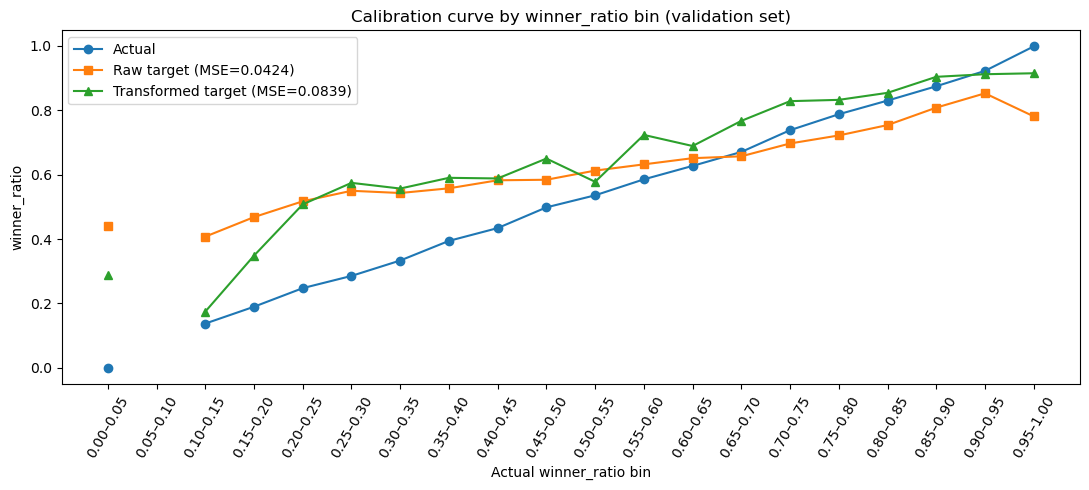

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# — assume you’ve already run your two pipelines and have:
#     y_val        : true winner_ratio on validation
#     y_pred_raw   : pipe_raw.predict(X_val)
#     y_pred_ttr   : pipe_ttr.predict(X_val)
# and computed:
mse_raw = mean_squared_error(y_val, y_pred_raw)
mse_ttr = mean_squared_error(y_val, y_pred_ttr)

print(f"\n▶ Raw-target    val MSE = {mse_raw:.5f}")
print(f"▶ Transformed‑target val MSE = {mse_ttr:.5f}\n")

# ────────────────────────────────────────────────────────────────────────────
# 7 · BIN‑LEVEL CALIBRATION TABLE & PLOT
# ────────────────────────────────────────────────────────────────────────────
# define 20 bins from 0 to 1
edges  = np.linspace(0, 1, 21)
labels = [f"{edges[i]:.2f}–{edges[i+1]:.2f}" for i in range(len(edges)-1)]

# build a DataFrame with actuals and both sets of predictions
df_bin = pd.DataFrame({
    "actual":    y_val,
    "pred_raw":  y_pred_raw,
    "pred_ttr":  y_pred_ttr
})
df_bin["bin"] = pd.cut(df_bin.actual, bins=edges, labels=labels, include_lowest=True)

# aggregate per bin
summary = (
    df_bin
    .groupby("bin", observed=False)
    .agg(
        n=("actual",   "size"),
        actual_mean=("actual",  "mean"),
        raw_mean=("pred_raw",   "mean"),
        ttr_mean=("pred_ttr",   "mean")
    )
    .reset_index()
)

print("=== mean winner_ratio per bin (validation) ===")
print(summary.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# plot calibration curves
plt.figure(figsize=(11,5))
plt.plot(summary.bin, summary.actual_mean, marker='o', label="Actual")
plt.plot(summary.bin, summary.raw_mean,    marker='s',
         label=f"Raw target (MSE={mse_raw:.4f})")
plt.plot(summary.bin, summary.ttr_mean,    marker='^',
         label=f"Transformed target (MSE={mse_ttr:.4f})")
plt.xticks(rotation=60)
plt.ylabel("winner_ratio")
plt.xlabel("Actual winner_ratio bin")
plt.legend()
plt.title("Calibration curve by winner_ratio bin (validation set)")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

from sklearn.model_selection           import train_test_split
from sklearn.preprocessing             import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose                   import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline                  import Pipeline
from sklearn.linear_model              import ElasticNetCV
from sklearn.metrics                   import mean_squared_error

# ───────────────────────────────────────────────────────────────────────────────
# 0 · Timing helper (optional)
# ───────────────────────────────────────────────────────────────────────────────
t0 = perf_counter()
def tick(msg):
    print(f"[{perf_counter()-t0:6.2f}s] {msg}")

# ───────────────────────────────────────────────────────────────────────────────
# 1 · Prepare data
# ───────────────────────────────────────────────────────────────────────────────
tick("Loading & splitting data")
# assume `train` is your DataFrame already in memory
y = train.pop("winner_ratio").values
X = train.copy()

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ───────────────────────────────────────────────────────────────────────────────
# 2 · Preprocessor
# ───────────────────────────────────────────────────────────────────────────────
pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", StandardScaler(),                     num_cols)
], sparse_threshold=0.3)

# ───────────────────────────────────────────────────────────────────────────────
# 3 · ElasticNetCV settings
# ───────────────────────────────────────────────────────────────────────────────
enet = ElasticNetCV(
    l1_ratio=[0.1,0.3,0.5,0.7,0.9,1.0],
    alphas=np.logspace(-4,1,30),
    cv=15,
    max_iter=50_000,    # increase for convergence
    tol=1e-3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# ───────────────────────────────────────────────────────────────────────────────
# 4 · Pipeline A: Raw target
# ───────────────────────────────────────────────────────────────────────────────
tick("Fitting ElasticNet on raw target")
pipe_raw = Pipeline([
    ("pre", pre),
    ("enet", enet)
])
pipe_raw.fit(X_tr, y_tr)

y_pred_raw = pipe_raw.predict(X_val)
mse_raw    = mean_squared_error(y_val, y_pred_raw)
print(f"\n▶ Raw-target ElasticNet  val MSE = {mse_raw:.5f}")

# ───────────────────────────────────────────────────────────────────────────────
# 5 · Pipeline B: arcsin‑√–transformed target
# ───────────────────────────────────────────────────────────────────────────────
tick("Fitting ElasticNet with arcsin‑√ target transform")
asin_sqrt = FunctionTransformer(
    func         = lambda u: np.arcsin(np.sqrt(u)),
    inverse_func = lambda v: np.sin(v)**2,
    validate     = True
)

ttr = TransformedTargetRegressor(
    regressor   = enet,
    transformer = asin_sqrt
)

pipe_ttr = Pipeline([
    ("pre", pre),
    ("ttr", ttr)
])
pipe_ttr.fit(X_tr, y_tr)


y_pred_ttr = pipe_ttr.predict(X_val)
mse_ttr    = mean_squared_error(y_val, y_pred_ttr)
print(f"▶ Arcsin√-target ElasticNet  val MSE = {mse_ttr:.5f}\n")

# ───────────────────────────────────────────────────────────────────────────────
# 6 · Diagnostic plots
# ───────────────────────────────────────────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Raw target
axes[0].scatter(y_val, y_pred_raw, alpha=0.35, s=15)
axes[0].plot([0,1],[0,1],"k--", lw=1)
axes[0].set_title(f"Raw target: MSE={mse_raw:.4f}")
axes[0].set_xlabel("Actual winner_ratio")
axes[0].set_ylabel("Predicted winner_ratio")

# Arcsin‑√ target
axes[1].scatter(y_val, y_pred_ttr, alpha=0.35, s=15)
axes[1].plot([0,1],[0,1],"k--", lw=1)
axes[1].set_title(f"Arcsin√ target: MSE={mse_ttr:.4f}")
axes[1].set_xlabel("Actual winner_ratio")
axes[1].set_ylabel("Predicted winner_ratio")

plt.tight_layout()
plt.show()
tick("Done")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# ╭───────────────────────────────────────────────────────────────╮
# │ 5 · blend formula                                            │
# ╰───────────────────────────────────────────────────────────────╯
blend_val = p1_val + (1 - p0_val - p1_val) * r_val
blend_tr  = p1_tr  + (1 - p0_tr  - p1_tr ) * r_tr  # if you also want train‐side

mse_val = mean_squared_error(y_val, blend_val)
print(f"{REG_NAME} blend  val MSE = {mse_val:.4f}")

# ╭───────────────────────────────────────────────────────────────╮
# │ 6 · bin‑level calibration table                              │
# ╰───────────────────────────────────────────────────────────────╯
edges  = np.linspace(0, 1, 21)  # create 20 bins of width 0.05
labels = [f"{edges[i]:.2f}–{edges[i+1]:.2f}" for i in range(len(edges)-1)]

df = pd.DataFrame({
    "actual": y_val,
    "pred":   blend_val
})
df["bin"] = pd.cut(df.actual, bins=edges, labels=labels, include_lowest=True)

summary = (
    df
    .groupby("bin", observed=False)
    .agg(
        n=("actual",    "size"),
        actual_mean=("actual", "mean"),
        pred_mean=("pred",     "mean")
    )
    .reset_index()
)

print("\n=== mean winner_ratio per bin (validation) ===")
print(summary.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# ╭───────────────────────────────────────────────────────────────╮
# │ 7 · calibration curve plot                                   │
# ╰───────────────────────────────────────────────────────────────╯
plt.figure(figsize=(11,4))
plt.plot(summary.bin, summary.actual_mean, marker='o', label="Actual")
plt.plot(summary.bin, summary.pred_mean,  marker='s',
         label=f"{REG_NAME} blend (MSE={mse_val:.4f})")
plt.xticks(rotation=60)
plt.ylabel("winner_ratio")
plt.legend()
plt.title(f"Calibration curve – {REG_NAME} Bernoulli blend")
plt.tight_layout()
plt.show()


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# — assume you already have:
#     y_val_ratio  # true winner_ratio on validation
#     prob_val_raw # raw model predictions
#     prob_val     # isotonic‑calibrated predictions

# ───────────────────────────────────────────────────────────────────────────────
# 5.5 · Scatter‑plots: actual vs. predicted (raw & isotonic)
# ───────────────────────────────────────────────────────────────────────────────




y_pred_raw = pipe_raw.predict(X_val)
mse_raw    = mean_squared_error(y_val, y_pred_raw)
print(f"\n▶ Raw-target ElasticNet  val MSE = {mse_raw:.5f}")
y_pred_ttr = pipe_ttr.predict(X_val)
mse_ttr    = mean_squared_error(y_val, y_pred_ttr)
print(f"▶ Arcsin√-target ElasticNet  val MSE = {mse_ttr:.5f}\n")


mse_raw = mean_squared_error(y_val, y_pred_raw)
mse_iso = mean_squared_error(y_val, y_pred_ttr)

print(f"\n▶ Raw model  val MSE = {mse_raw:.5f}")
print(f"▶ Isotonic    val MSE = {mse_iso:.5f}\n")

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Raw predictions
axes[0].scatter(y_val_ratio, prob_val_raw, alpha=0.35, s=15)
axes[0].plot([0,1], [0,1], "k--", lw=1)
axes[0].set_title(f"Raw predictions: MSE={mse_raw:.4f}")
axes[0].set_xlabel("Actual winner_ratio")
axes[0].set_ylabel("Predicted winner_ratio")

# Isotonic predictions
axes[1].scatter(y_val_ratio, prob_val, alpha=0.35, s=15)
axes[1].plot([0,1], [0,1], "k--", lw=1)
axes[1].set_title(f"Isotonic predictions: MSE={mse_iso:.4f}")
axes[1].set_xlabel("Actual winner_ratio")
axes[1].set_ylabel("Predicted winner_ratio")

plt.tight_layout()
plt.show()


# ───────────────────────────────────────────────────────────────────────────────
# 6 · BIN‑LEVEL CALIBRATION TABLE
# ───────────────────────────────────────────────────────────────────────────────
edges  = np.linspace(0, 1, 21)  # 20 bins of width 0.05
labels = [f"{edges[i]:.2f}–{edges[i+1]:.2f}" for i in range(len(edges)-1)]

df_bin = pd.DataFrame({
    "actual":   y_val_ratio,
    "pred_raw": prob_val_raw,
    "pred_iso": prob_val
})
df_bin["bin"] = pd.cut(df_bin.actual, bins=edges,
                       labels=labels, include_lowest=True)

def _sum(d):
    return pd.Series({
        "n":            len(d),
        "actual_mean":  d.actual.mean(),
        "pred_raw":     d.pred_raw.mean(),
        "pred_iso":     d.pred_iso.mean()
    })

summary = df_bin.groupby("bin").apply(_sum).reset_index()

print("\n=== mean probabilities per bin (validation) ===")
print(summary.to_string(index=False, float_format=lambda x: f"{x:0.4f}"))


# ───────────────────────────────────────────────────────────────────────────────
# 7 · CALIBRATION CURVE PLOT
# ───────────────────────────────────────────────────────────────────────────────
plt.figure(figsize=(11,4))
plt.plot(summary.bin, summary.actual_mean, marker='o', label="Actual")
plt.plot(summary.bin, summary.pred_raw , marker='s', label="Raw")
plt.plot(summary.bin, summary.pred_iso , marker='^', label="Isotonic")
plt.xticks(rotation=60)
plt.ylabel("winner_ratio")
plt.legend()
plt.title("Calibration curve by winner_ratio bin (validation set)")
plt.tight_layout()
plt.show()


NameError: name 'y_val_ratio' is not defined

### Model Training Starts on original tar_var

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.


[   0.0s] Preparing target & predictors
[   0.0s] Splitting 80/20 train–val
[   0.0s] Building preprocessing pipeline
[   0.0s] Fitting Elastic‑Net CV …


......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.8s
....................

[  11.2s] Model fit complete
[  11.2s] Validation MSE = 0.042441
   best α       = 0.0001
   best ℓ₁‑ratio = 0.7


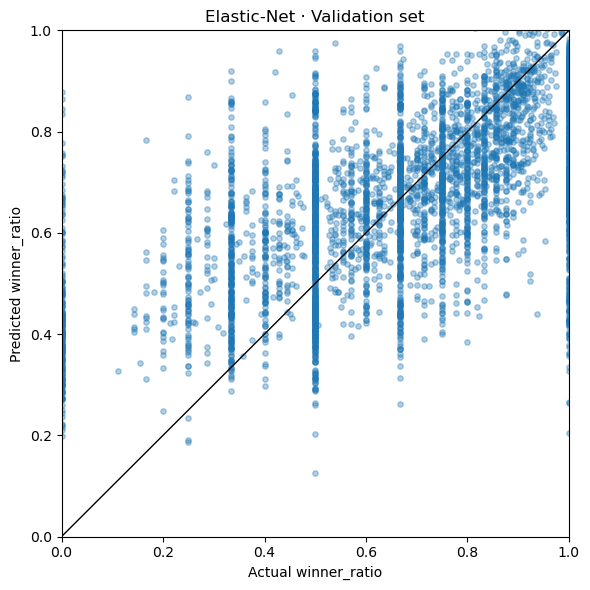

[  11.2s] Finished


In [1867]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection   import train_test_split
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.linear_model      import ElasticNetCV
from sklearn.metrics           import mean_squared_error
from time import perf_counter

# ---------------------------------------------------------
# 0 · basic timing helper
# ---------------------------------------------------------
t0 = perf_counter()
def tick(msg):
    print(f"[{perf_counter()-t0:6.1f}s] {msg}")

# ---------------------------------------------------------
# 1 · target / predictors
# ---------------------------------------------------------
tick("Preparing target & predictors")
y = train.pop("winner_ratio")
X = train

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols)

# ---------------------------------------------------------
# 2 · train / validation split
# ---------------------------------------------------------
tick("Splitting 80/20 train–val")
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=None)

# ---------------------------------------------------------
# 3 · preprocessing + model
# ---------------------------------------------------------
tick("Building preprocessing pipeline")
pre = ColumnTransformer(
      [("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
       ("num", StandardScaler(),                     num_cols)],
      sparse_threshold=0.3)

enet = ElasticNetCV(
        l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
        alphas=np.logspace(-4, 1, 30),
        cv=15,
        max_iter=20_000,
        n_jobs=-1,
        verbose=1,          # <‑‑ prints CV progress
        random_state=42)

pipe = Pipeline([("pre", pre), ("enet", enet)])

# ---------------------------------------------------------
# 4 · fit
# ---------------------------------------------------------
tick("Fitting Elastic‑Net CV …")
pipe.fit(X_tr, y_tr)
tick("Model fit complete")

# ---------------------------------------------------------
# 5 · evaluate
# ---------------------------------------------------------
y_pred = pipe.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred)
tick(f"Validation MSE = {mse_val:.6f}")
print(f"   best α       = {pipe.named_steps['enet'].alpha_:.4f}")
print(f"   best ℓ₁‑ratio = {pipe.named_steps['enet'].l1_ratio_}")

# ---------------------------------------------------------
# 6 · diagnostic plot
# ---------------------------------------------------------
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred, alpha=0.35, s=15)
lim = [0, 1]
plt.plot(lim, lim, c="k", lw=1)
plt.xlim(lim); plt.ylim(lim)
plt.xlabel("Actual winner_ratio")
plt.ylabel("Predicted winner_ratio")
plt.title("Elastic‑Net · Validation set")
plt.tight_layout()
plt.show()
tick("Finished")


In [1869]:
from sklearn.linear_model import ElasticNet

# ----------------------------------------------
# 1 · Extract full feature names after OHE + scale
# ----------------------------------------------
ohe = pipe.named_steps["pre"].named_transformers_["cat"]
num = pipe.named_steps["pre"].named_transformers_["num"]
cat_feature_names = ohe.get_feature_names_out(cat_cols)
full_feature_names = np.concatenate([cat_feature_names, num_cols])

# ----------------------------------------------
# 2 · Get coefficients
# ----------------------------------------------
coef = pipe.named_steps["enet"].coef_

feature_importance = pd.Series(coef, index=full_feature_names)
important_feats = feature_importance[feature_importance.abs() > 1e-4].sort_values(ascending=False)

print("Top features:\n", important_feats.head(10))

# ----------------------------------------------
# 3 · Rebuild pipeline using only top features
# ----------------------------------------------
top_feats = important_feats.index.tolist()

# Build a new transformer for only these
pre_reduced = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), [c for c in cat_cols if any(f.startswith("state_") or f.startswith("contributor_type_") or f.startswith("general_sector_new_") for f in top_feats)]),
    ("num", StandardScaler(), [f for f in top_feats if f in num_cols])
], sparse_threshold=0.3)

enet_final = ElasticNet(
    alpha=pipe.named_steps["enet"].alpha_,
    l1_ratio=pipe.named_steps["enet"].l1_ratio_,
    max_iter=20000
)

pipe_reduced = Pipeline([("pre", pre_reduced), ("enet", enet_final)])

# ----------------------------------------------
# 4 · Refit and evaluate
# ----------------------------------------------
pipe_reduced.fit(X_tr, y_tr)
y_pred_reduced = pipe_reduced.predict(X_val)
mse_reduced = mean_squared_error(y_val, y_pred_reduced)

print(f"\n📉 Refined model MSE: {mse_reduced:.6f} using {len(top_feats)} features")


Top features:
 politician_incumbency_ratio_logit      0.350137
politician_incumbency_ratio_is_zero    0.156200
state_CO                               0.050972
state_CT                               0.032078
contribution_total_sum_2010_usd_log    0.031930
state_NY                               0.026806
state_NC                               0.026107
state_WA                               0.024012
politician_challenger_ratio_is_one     0.016467
contributor_type_Non-Individual        0.016454
dtype: float64

📉 Refined model MSE: 0.042441 using 53 features


In [1870]:
important_feats

politician_incumbency_ratio_logit                  0.350137
politician_incumbency_ratio_is_zero                0.156200
state_CO                                           0.050972
state_CT                                           0.032078
contribution_total_sum_2010_usd_log                0.031930
state_NY                                           0.026806
state_NC                                           0.026107
state_WA                                           0.024012
politician_challenger_ratio_is_one                 0.016467
contributor_type_Non-Individual                    0.016454
state_VT                                           0.016193
state_MA                                           0.012803
state_MT                                           0.012427
general_sector_new_Construction & Manufacturing    0.012304
state_LA                                           0.011124
state_NM                                           0.010657
general_sector_new_Other / Misc         

In [1871]:
train = train_bkp.copy()

best α      : 0.0001
best l1     : 1.0
val MSE full: 0.04246110409273467


/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_64617/2934788945.py:60: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(); plt.show()


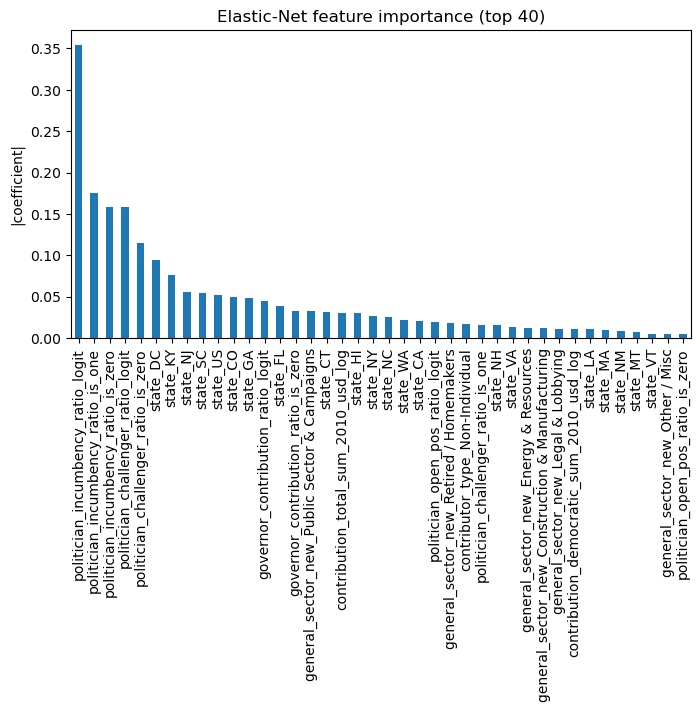

val MSE reduced: 0.042461462679275155


['elasticnet_final.pkl']

In [1872]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection   import train_test_split
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.linear_model      import ElasticNetCV, ElasticNet
from sklearn.metrics           import mean_squared_error
import joblib                   # for saving pipeline

# ---------- raw df ----------
y  = train.pop("winner_ratio")
X  = train
cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols)

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42)

pre = ColumnTransformer(
        [("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
         ("num", StandardScaler(),                     num_cols)],
        sparse_threshold=0.3)

enetcv = ElasticNetCV(
    l1_ratio=[0.1,0.3,0.5,0.7,0.9,1.0],
    alphas=np.logspace(-4,1,30),
    cv=5,
    max_iter=20_000,
    n_jobs=-1,
    verbose=0,
    random_state=42)

pipe_full = Pipeline([("pre", pre), ("enet", enetcv)])
pipe_full.fit(X_tr, y_tr)

print("best α      :", pipe_full['enet'].alpha_)
print("best l1     :", pipe_full['enet'].l1_ratio_)
print("val MSE full:", mean_squared_error(y_val, pipe_full.predict(X_val)))


##### # 2 · Extract importances & scree‑plot
# ------------ get full feature names -------------
ohe = pipe_full['pre'].named_transformers_['cat']
full_feat = np.concatenate([ohe.get_feature_names_out(cat_cols), num_cols])

coef_full = pd.Series(pipe_full['enet'].coef_, index=full_feat)
imp = coef_full.abs().sort_values(ascending=False)

# 1e‑4 in digits  ➜ 0.0001
threshold = 1e-4        # === 0.0001
top_feats = imp[imp > threshold].index.tolist()

# ------------ scree chart -------------
plt.figure(figsize=(8,4))
imp.head(40).plot(kind='bar')
plt.ylabel("|coefficient|")
plt.title("Elastic‑Net feature importance (top 40)")
plt.tight_layout(); plt.show()

###### 3 · Refit Elastic‑Net on important features
# keep only chosen numeric columns
num_keep = [f for f in top_feats if f in num_cols]

# identify the cat levels actually present in top_feats
cat_keep = [c for c in cat_cols if any(f.startswith(c+"_") for f in top_feats)]

pre_reduced = ColumnTransformer(
        [("cat", OneHotEncoder(handle_unknown="ignore"), cat_keep),
         ("num", StandardScaler(),                     num_keep)],
        sparse_threshold=0.3)

enet_final = ElasticNet(alpha=pipe_full['enet'].alpha_,
                        l1_ratio=pipe_full['enet'].l1_ratio_,
                        max_iter=20_000,
                        random_state=42)

pipe_final = Pipeline([("pre", pre_reduced), ("enet", enet_final)])
pipe_final.fit(X_tr, y_tr)

print("val MSE reduced:", mean_squared_error(y_val, pipe_final.predict(X_val)))

### → Save pipeline for later / test
joblib.dump(pipe_final, "elasticnet_final.pkl")
# later: pipe_loaded = joblib.load("elasticnet_final.pkl")


In [1880]:
train = train_bkp.copy()

In [ ]:
# ==================================================================================
# 0 · PREP  ------------------------------------------------------------------------
# ==================================================================================
import numpy as np, pandas as pd, matplotlib.pyplot as plt, joblib, time
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn.compose        import ColumnTransformer
from sklearn.pipeline       import Pipeline
from sklearn.metrics        import mean_squared_error
from sklearn.ensemble       import RandomForestRegressor
from xgboost                import XGBRegressor

# raw df ------------------------------------------------
y = train.pop("winner_ratio")
X = train
cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols)

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

# helper to time steps
t0 = time.perf_counter()
tick = lambda m: print(f"[{time.perf_counter()-t0:6.1f}s] {m}")

# ==================================================================================
# 1 · MAKE GENERIC BUILD‑AND‑REFIT FUNCTION ----------------------------------------
# ==================================================================================
def tree_workflow(name, base_estimator, param_dist, top_k=40, n_iter=25):
    """
    - RandomizedSearchCV to find best hyper‑params
    - Refit on most important top_k features
    - Return the reduced pipeline + metrics
    """

    tick(f"🔍 {name}: hyper‑param search")
    pre = ColumnTransformer(
            [("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
             ("num", "passthrough",                         num_cols)],
            sparse_threshold=0.3)

    pipe = Pipeline([("pre", pre), ("model", base_estimator)])

    search = GridSearchCV(
                pipe, param_dist,
                # n_iter=n_iter, 
                scoring="neg_mean_squared_error",
                cv=3, verbose=0, n_jobs=-1, 
                # random_state=42
                )

    search.fit(X_tr, y_tr)
    best_pipe = search.best_estimator_
    best_model = best_pipe.named_steps["model"]
    tick(f"   best params: {search.best_params_}")

    # full‑model MSE
    mse_val_full = mean_squared_error(y_val, best_pipe.predict(X_val))
    mse_tr_full  = mean_squared_error(y_tr, best_pipe.predict(X_tr))
    tick(f"   full MSE  (train/val) = {mse_tr_full:.4f} / {mse_val_full:.4f}")

    # ------------------ feature names & importance ------------------
    ohe = best_pipe.named_steps["pre"].named_transformers_["cat"]
    feat_names = np.concatenate([ohe.get_feature_names_out(cat_cols), num_cols])

    if hasattr(best_model, "feature_importances_"):
        importances = best_model.feature_importances_
    else:                                        # XGBRegressor .get_booster()
        importances = best_model.feature_importances_

    imp_series = pd.Series(importances, index=feat_names).sort_values(ascending=False)
    top_feats  = imp_series.head(top_k).index.tolist()

    # deduce which original cols to pass through
    num_keep = [f for f in top_feats if f in num_cols]
    cat_keep = [c for c in cat_cols if any(f.startswith(c + "_") for f in top_feats)]

    pre_reduced = ColumnTransformer(
        [("cat", OneHotEncoder(handle_unknown="ignore"), cat_keep),
         ("num", "passthrough",                         num_keep)],
        sparse_threshold=0.3)

    model_reduced = base_estimator.__class__(**best_model.get_params())
    pipe_reduced  = Pipeline([("pre", pre_reduced), ("model", model_reduced)])
    pipe_reduced.fit(X_tr, y_tr)

    mse_val_red = mean_squared_error(y_val, pipe_reduced.predict(X_val))
    mse_tr_red  = mean_squared_error(y_tr,  pipe_reduced.predict(X_tr))
    tick(f"   reduced MSE (train/val) = {mse_tr_red:.4f} / {mse_val_red:.4f}")
    tick(f"   kept {len(top_feats)} features")

    # save
    fname = f"{name.lower()}_pipeline.pkl"
    joblib.dump(pipe_reduced, fname)
    tick(f"   pipeline saved → {fname}\n")

    # plot diag
    plt.figure(figsize=(5,5))
    plt.scatter(y_val, pipe_reduced.predict(X_val), alpha=0.3, s=12)
    lim=[0,1]; plt.plot(lim,lim,'k--'); plt.xlim(lim); plt.ylim(lim)
    plt.title(f"{name} (val) MSE={mse_val_red:.4f}")
    plt.xlabel("Actual"); plt.ylabel("Predicted"); plt.tight_layout()
    plt.show()

# ==================================================================================
# 2 · RANDOM FOREST ----------------------------------------------------------------
# ==================================================================================
rf_params = dict(
    model__n_estimators = np.arange(300, 2001, 100),
    model__max_depth    = [None,3,5,7,9],
    model__min_samples_leaf=[1,2,4],
    model__max_features = ["sqrt","log2",0.6]
)

tree_workflow(
    "RandomForest",
    RandomForestRegressor(n_jobs=-1, random_state=42),
    rf_params, top_k=40, n_iter=25
)

# ==================================================================================
# 3 · XGBOOST ----------------------------------------------------------------------
# ==================================================================================
xgb_params = dict(
    model__n_estimators   = np.arange(400, 2001, 200),
    model__learning_rate  = np.linspace(0.02, 0.15, 8),
    model__max_depth      = [3,4,5,6,7],
    model__subsample      = [0.6,0.8,1.0],
    model__colsample_bytree=[0.6,0.8,1.0],
    model__gamma          = [0,0.5,1],
)

tree_workflow(
    "XGBoost",
    XGBRegressor(objective="reg:squarederror",
                 eval_metric="rmse",
                 n_jobs=-1, random_state=42),
    xgb_params, top_k=40, n_iter=30
)


[   0.0s] 🔍 RandomForest: hyper‑param search


/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Train MSE: 0.06028522318995205
Validation MSE: 0.10006120020044282


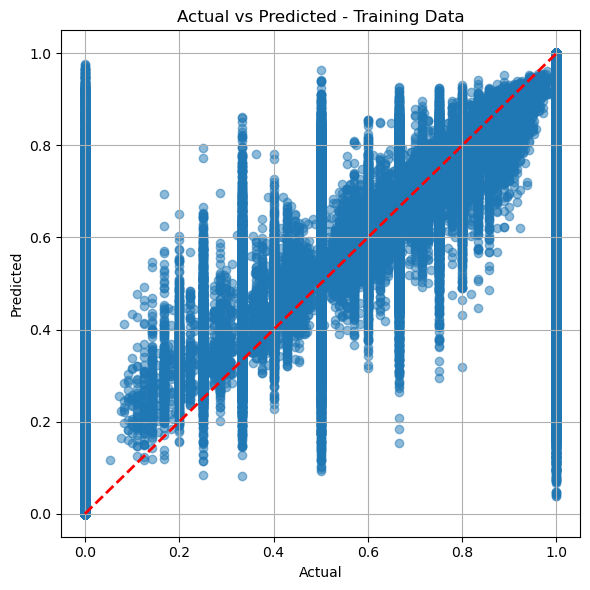

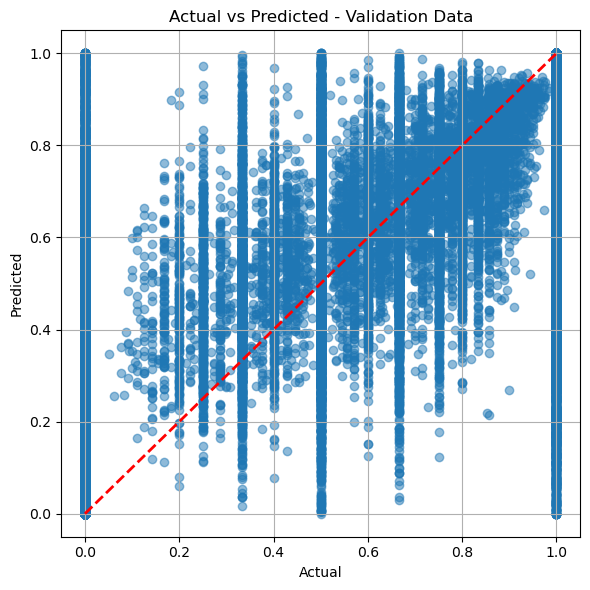

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# ✅ Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(training_data, train_y, test_size=0.25, random_state=42)

# ✅ Initialize Random Forest with fixed parameters
rf_model = RandomForestRegressor(
    n_estimators=45,
    max_depth=25,
    min_samples_split=3,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# ✅ Fit model
rf_model.fit(X_train, y_train)

# ✅ Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)

# ✅ Evaluation
print("Train MSE:", metrics.mean_squared_error(y_train, y_train_pred))
print("Validation MSE:", metrics.mean_squared_error(y_val, y_val_pred))

# ✅ Plot actual vs predicted
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_train, y_train_pred, "Actual vs Predicted - Training Data")
plot_actual_vs_predicted(y_val, y_val_pred, "Actual vs Predicted - Validation Data")


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics

# ✅ Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(training_data, train_y, test_size=0.25, random_state=42)

# ✅ Hyperparameter grid
param_grid = {
    'n_estimators': range(1, 50, 5),
    'max_depth': range(1, 30, 5),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# ✅ Model and GridSearch
model3 = RandomForestRegressor(random_state=42)
rf_optimized = GridSearchCV(
    estimator=model3,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

# ✅ Fit on training data
rf_optimized.fit(X_train, y_train)

# ✅ Predict
y_train_pred = rf_optimized.predict(X_train)
y_val_pred = rf_optimized.predict(X_val)

# ✅ Evaluate
print("Train MSE:", metrics.mean_squared_error(y_train, y_train_pred))
print("Validation MSE:", metrics.mean_squared_error(y_val, y_val_pred))

# ✅ Plot actual vs. predicted
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_train, y_train_pred, "Actual vs Predicted - Training Data")
plot_actual_vs_predicted(y_val, y_val_pred, "Actual vs Predicted - Validation Data")


Fitting 3 folds for each of 900 candidates, totalling 2700 fits


KeyboardInterrupt: 